In [1]:
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import gzip
import imageio
import os
import csv

In [2]:
#path to experiment data:
agent_trajectories_path = '/home/users/kmgreen/Code/eco_rl_games/test_experiment_rews_onehundred_iterations/episodes/agent_trajectory.csv'
map_history_path = '/home/users/kmgreen/Code/eco_rl_games/test_experiment_rews_onehundred_iterations/crystal.npy.gz'

In [3]:
f = gzip.GzipFile(map_history_path, "r")
a = np.load(f)

In [4]:
a.shape  #100 nodes, 100 iterations

(100, 100, 1)

In [5]:
len(a[1]) #a[i] gives the number of agents at each node at iteration 0 

100

In [6]:
#calculate entropy of state at each iteration:

#want to sum over all nodes plog(p) where p= no of agents on a node/total number of agents 
#update code to also save rewards and then can compare how cumulative rewards correspond to system entropy

def sys_entropy(state_map, agent_num):    #input map representation of system
    
    node_ent = []
    
    for node in range(0, len(state_map)):
        
        if state_map[node] != 0:  #log(0) undefined
        
            ent = state_map[node]/agent_num * np.log(state_map[node]/agent_num)
            node_ent.append(ent)
        
    state_ent = np.sum(node_ent)
    return state_ent  

In [7]:
sys_entropy(a[1],20)

system_entropy = []

for i in range(0,100):
    
    sys_ent = sys_entropy(a[i],20)
    system_entropy.append(sys_ent)

In [8]:
#system_entropy

In [9]:
#plot agent trajectories over time - better to do this from map representation or agent-node trajectories?
G = nx.cycle_graph(100)
node_pos = nx.circular_layout(G)
nodes = list(G.nodes)
#print(node_pos)

In [10]:
rewards = []
with open(agent_trajectories_path, newline='') as csvfile:      #to do: sort out this saving format 
    reader = csv.reader(csvfile, delimiter=',', quotechar=',')
    for row in reader:
        rewards.append(row[3])
        #print(', '.join(row))

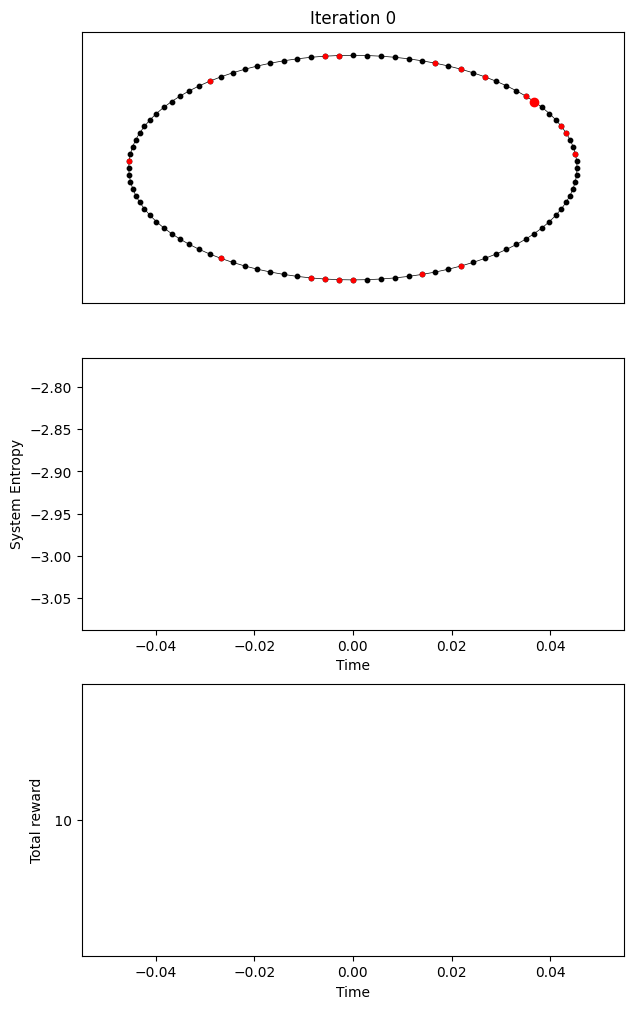

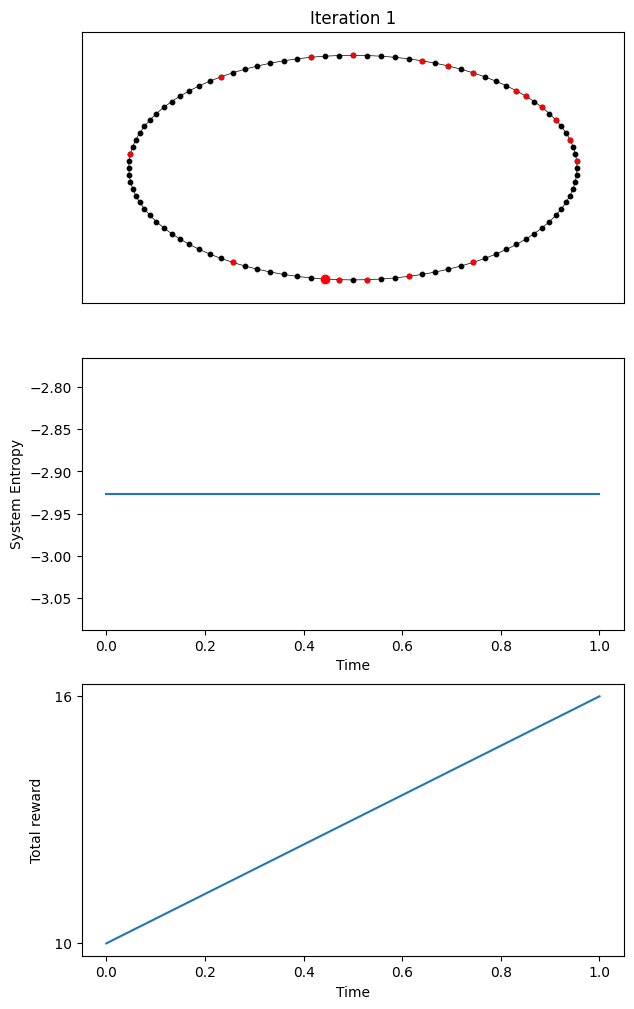

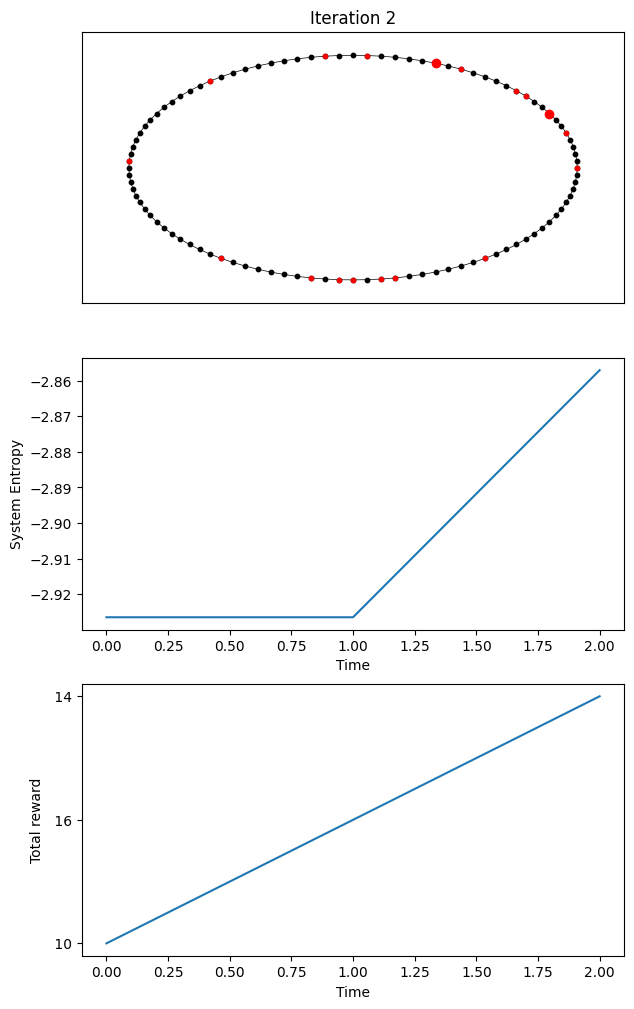

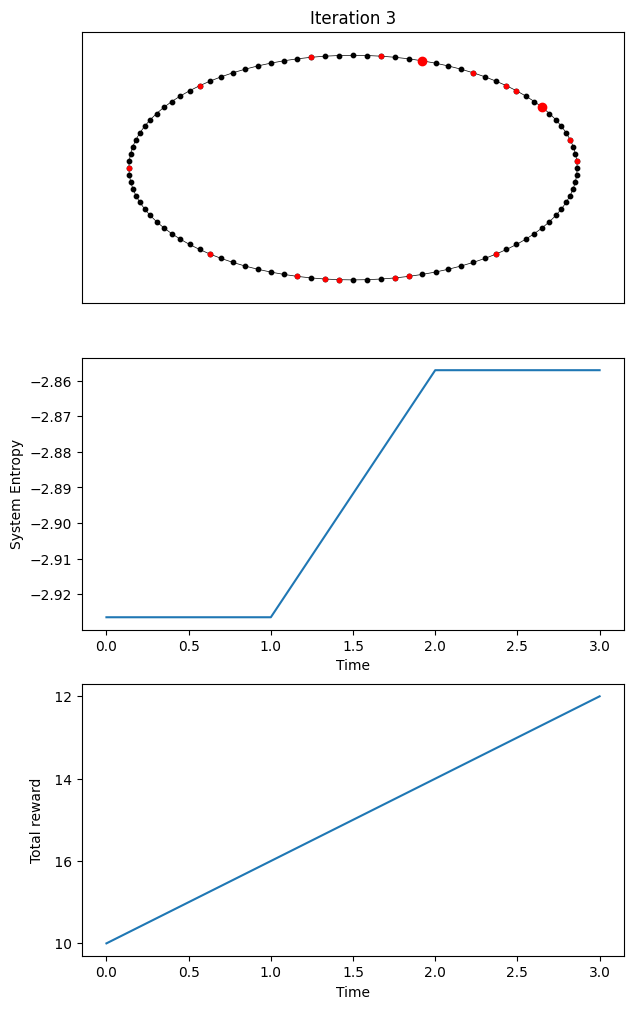

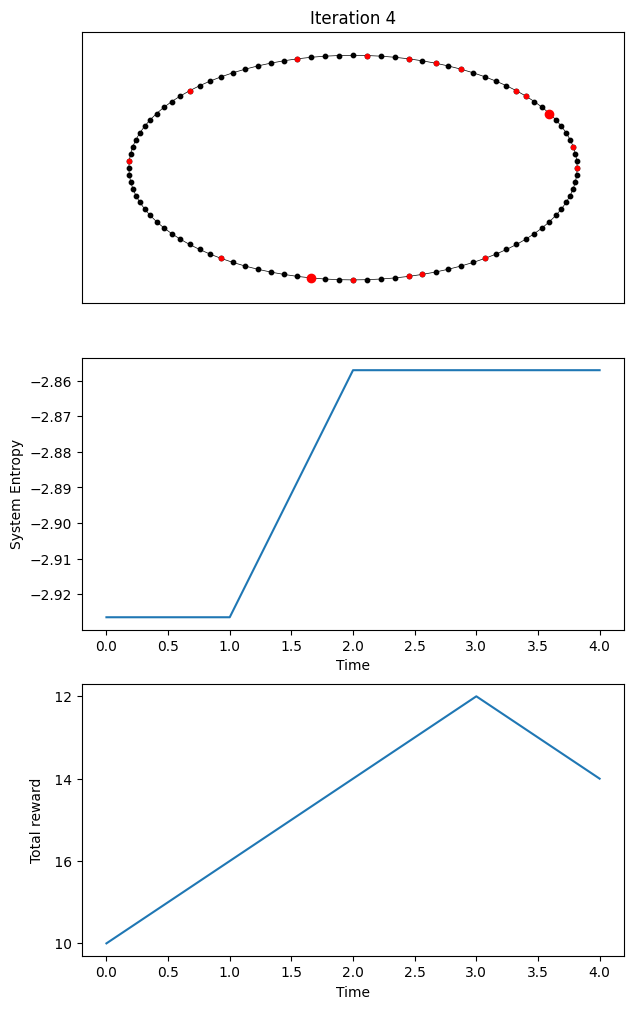

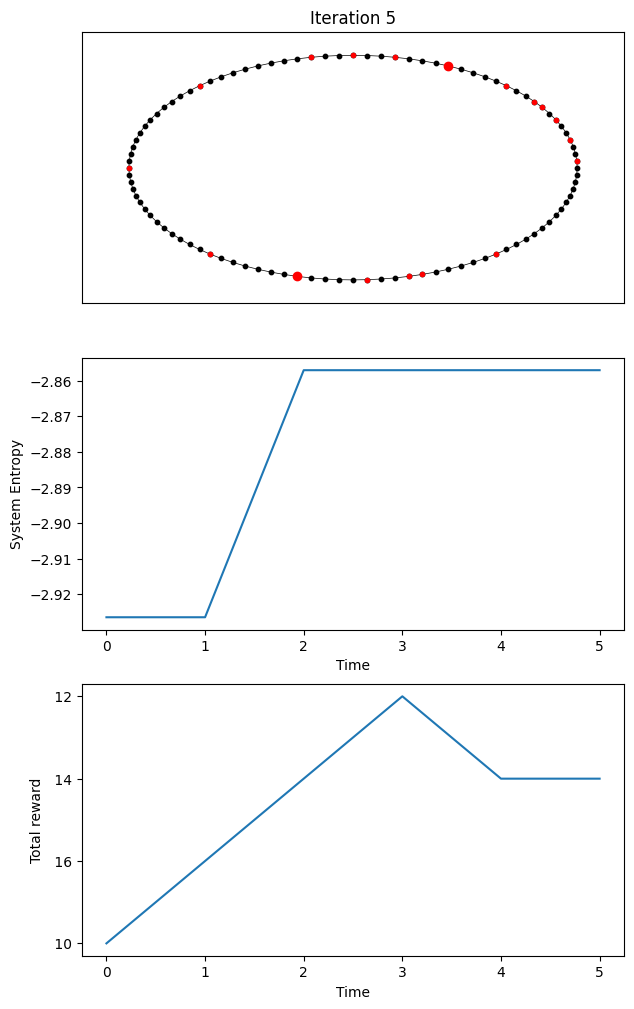

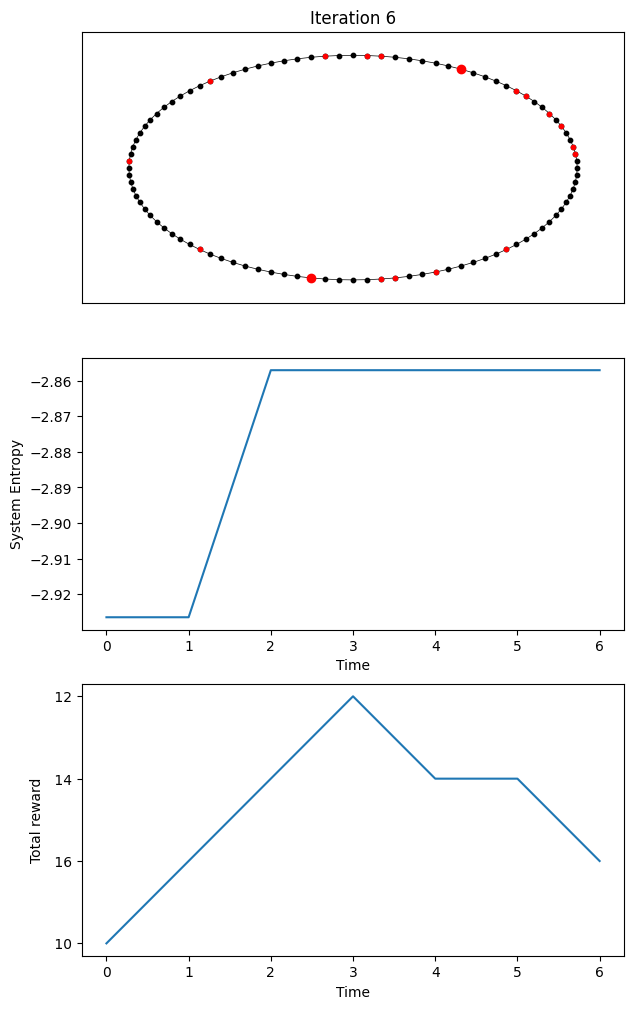

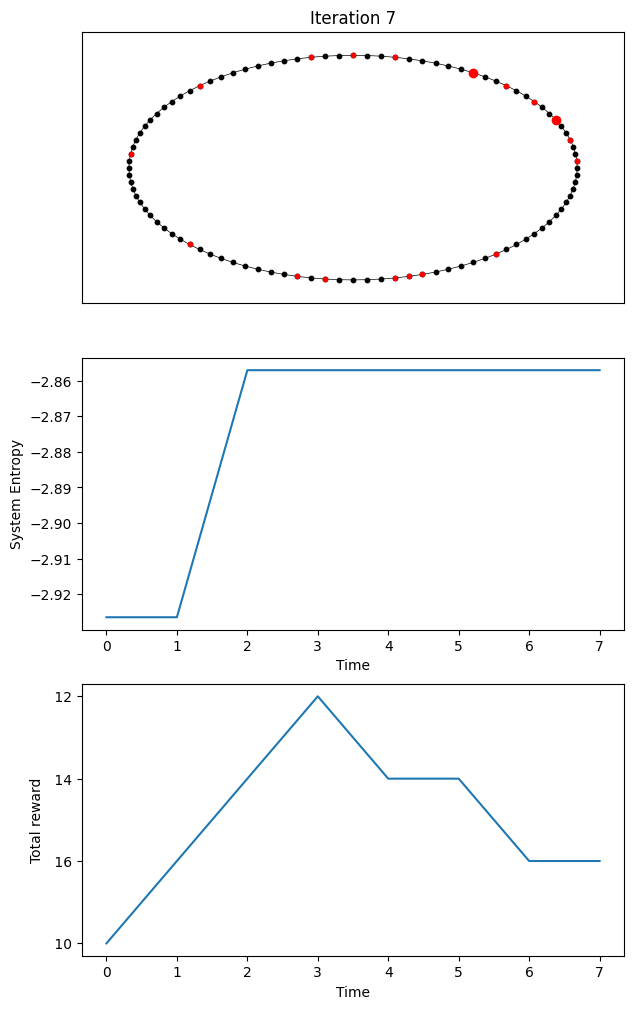

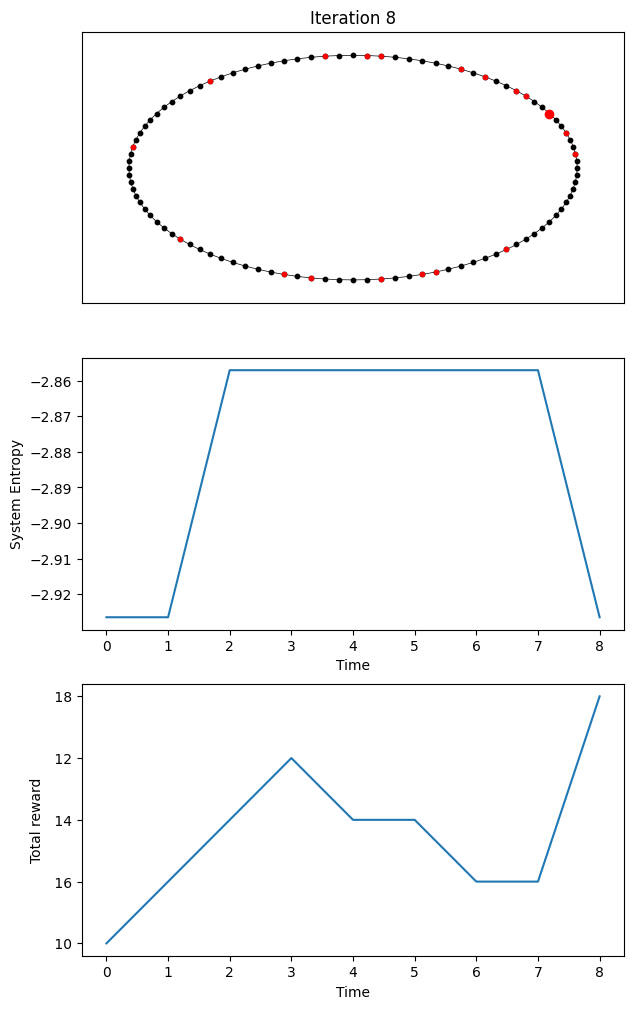

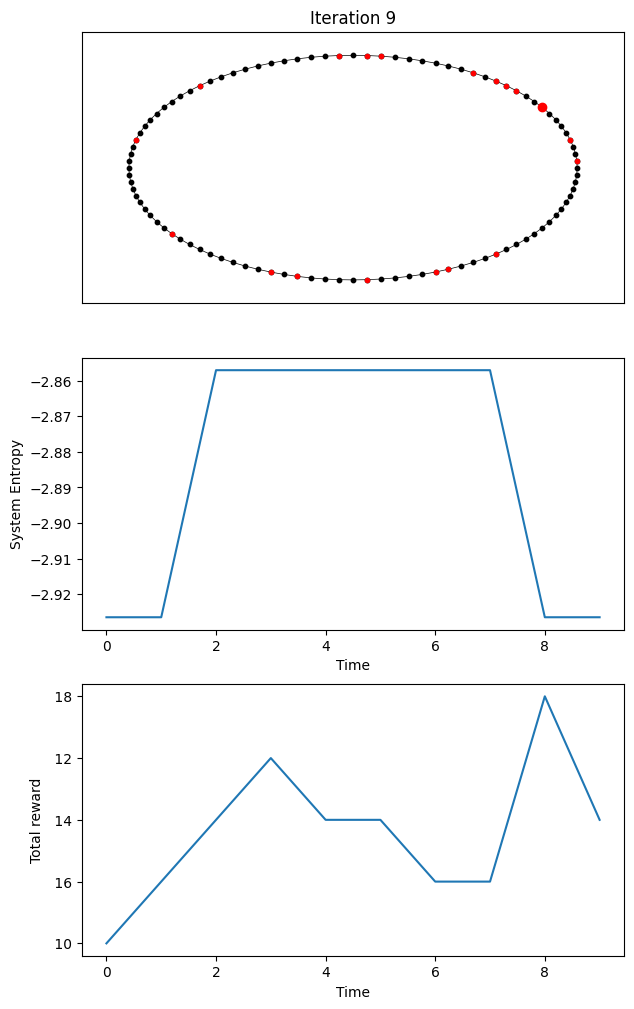

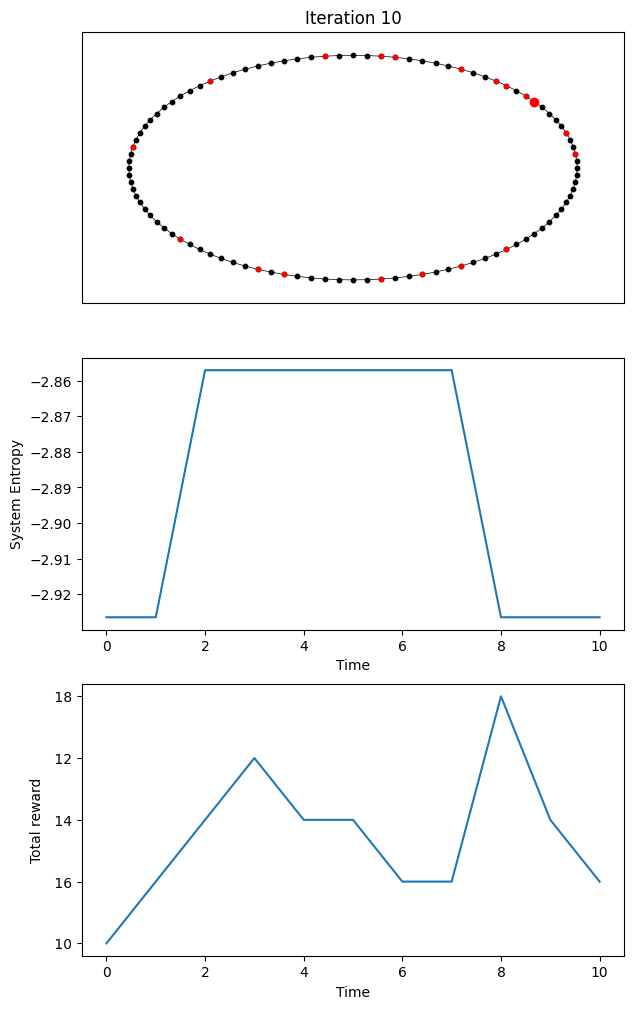

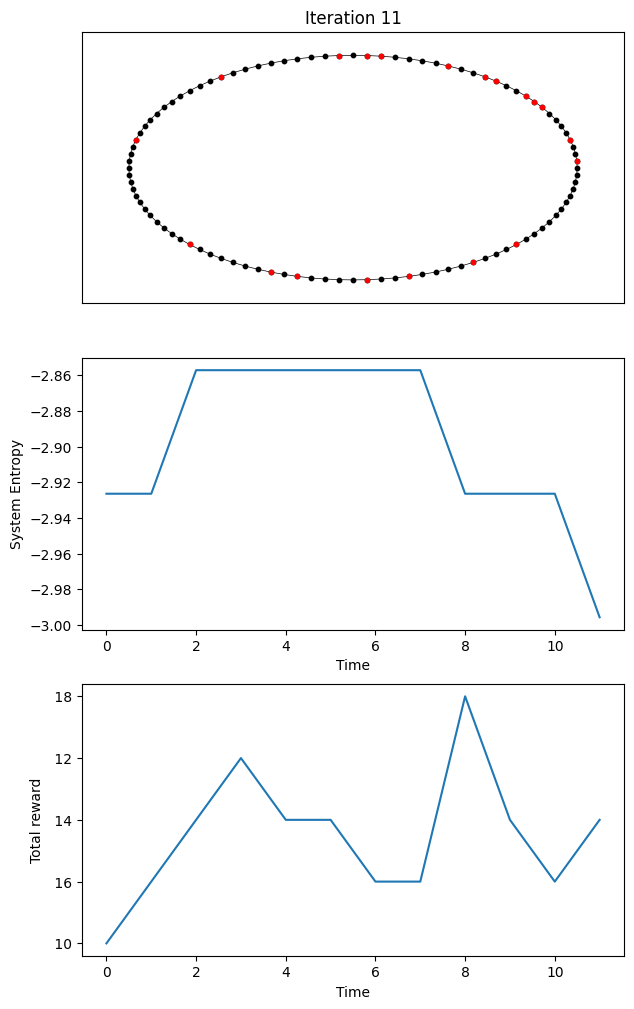

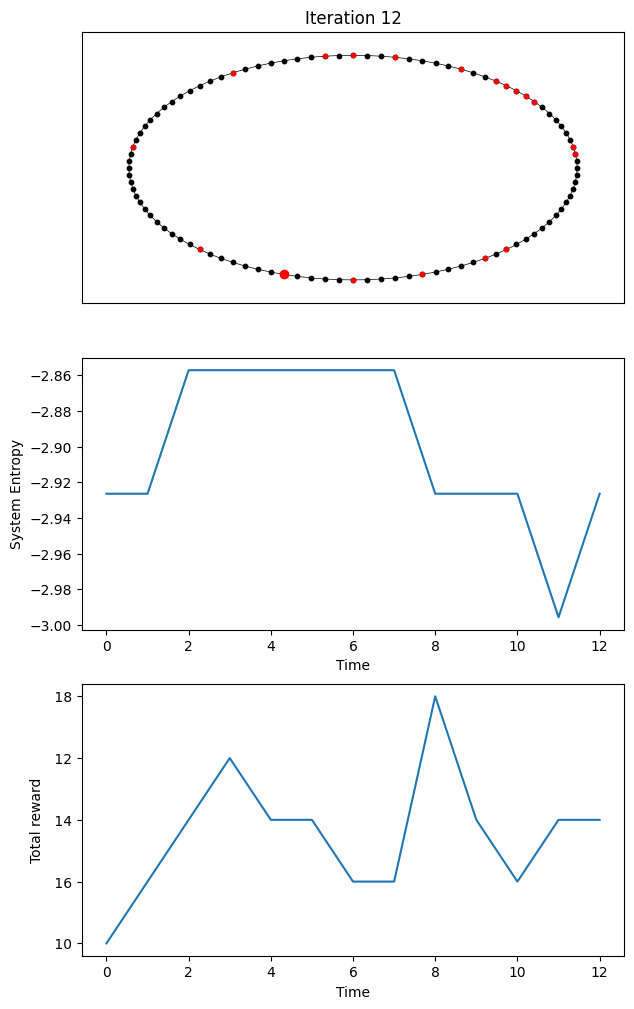

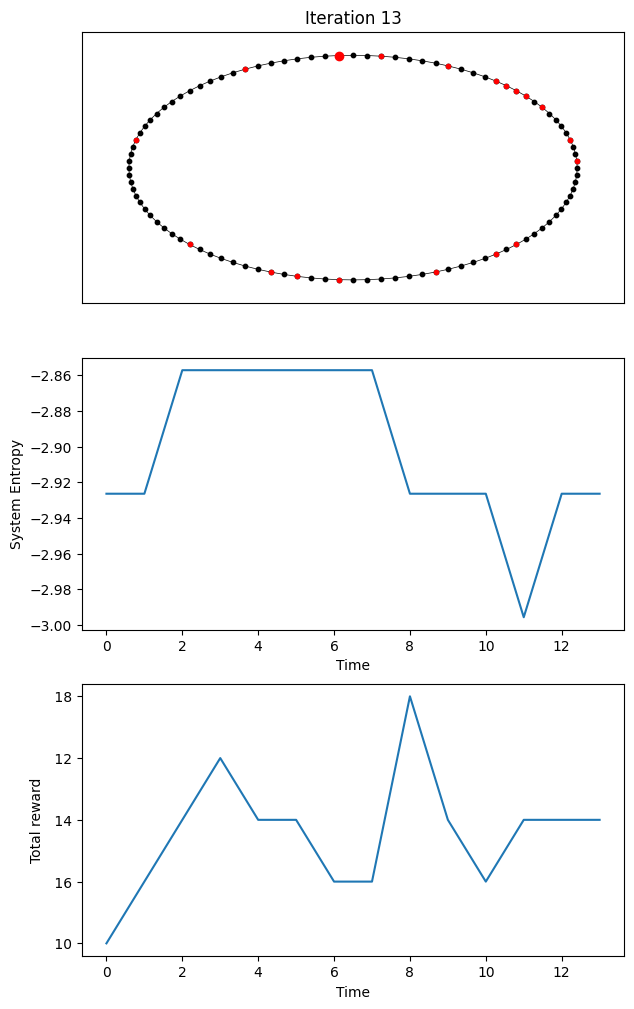

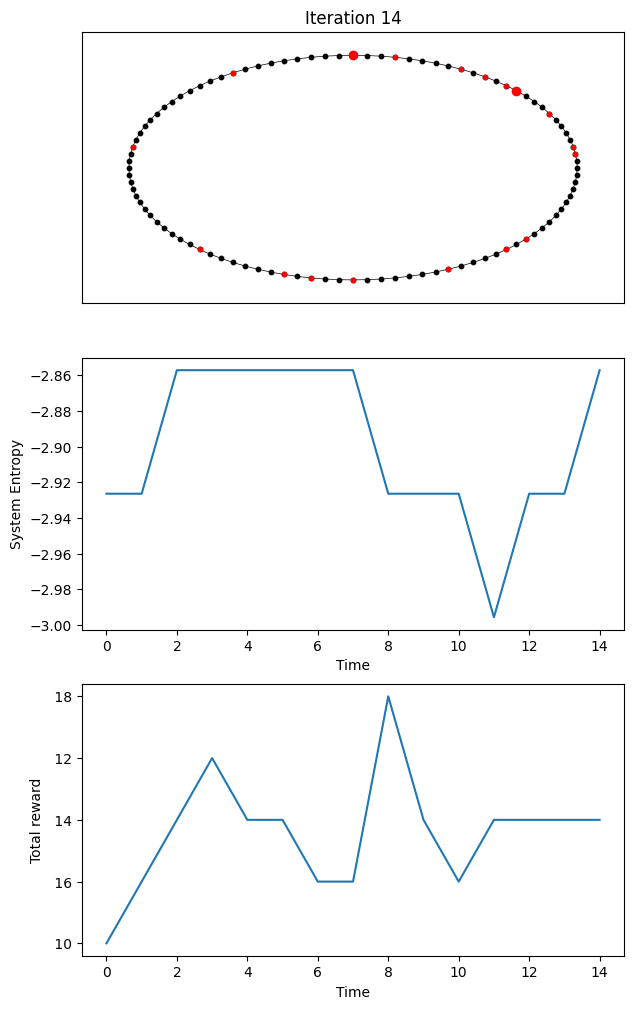

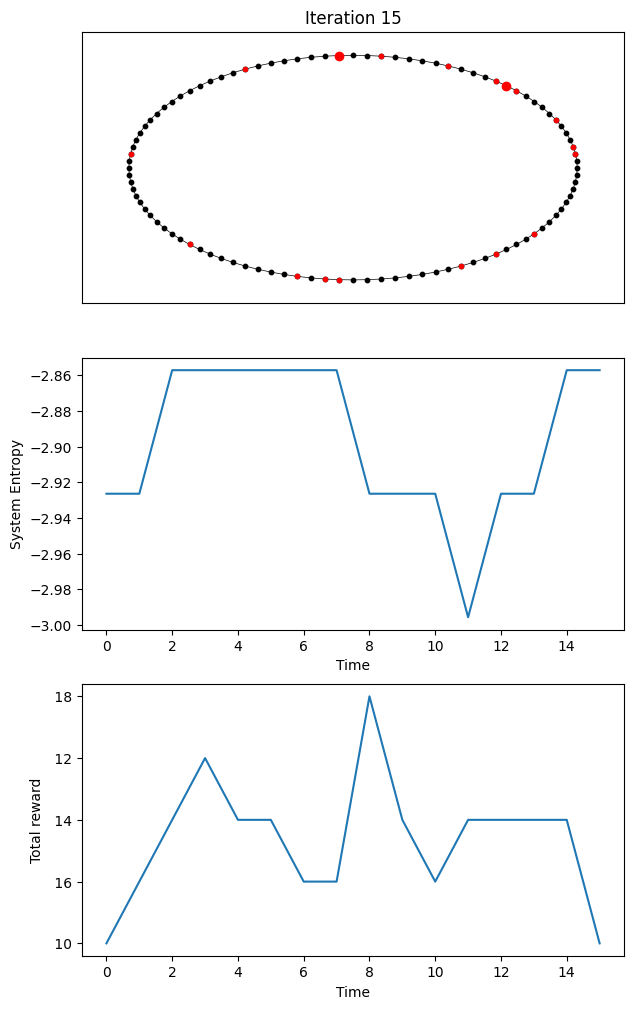

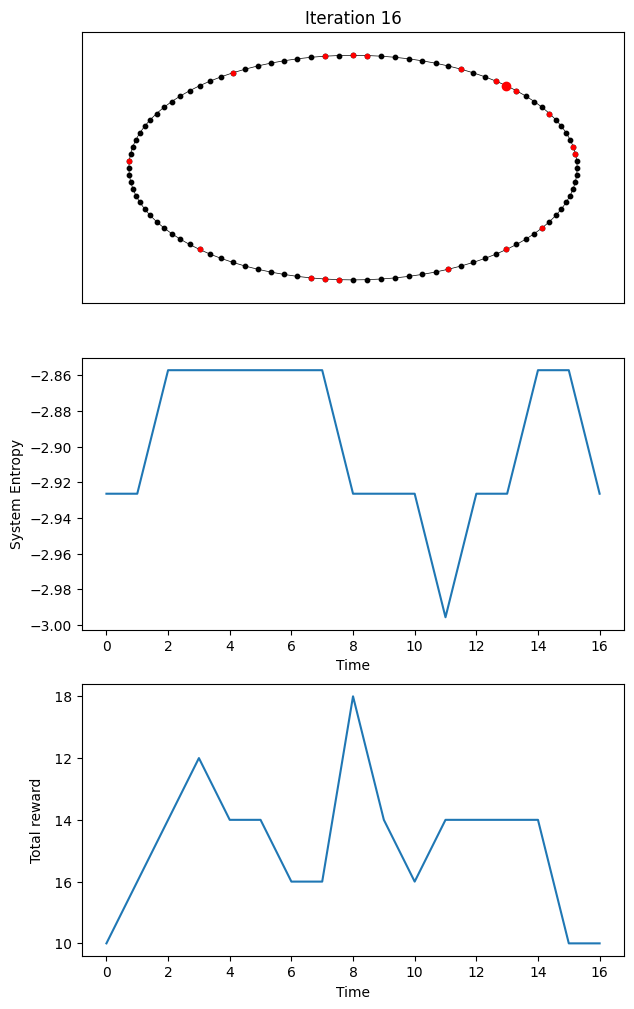

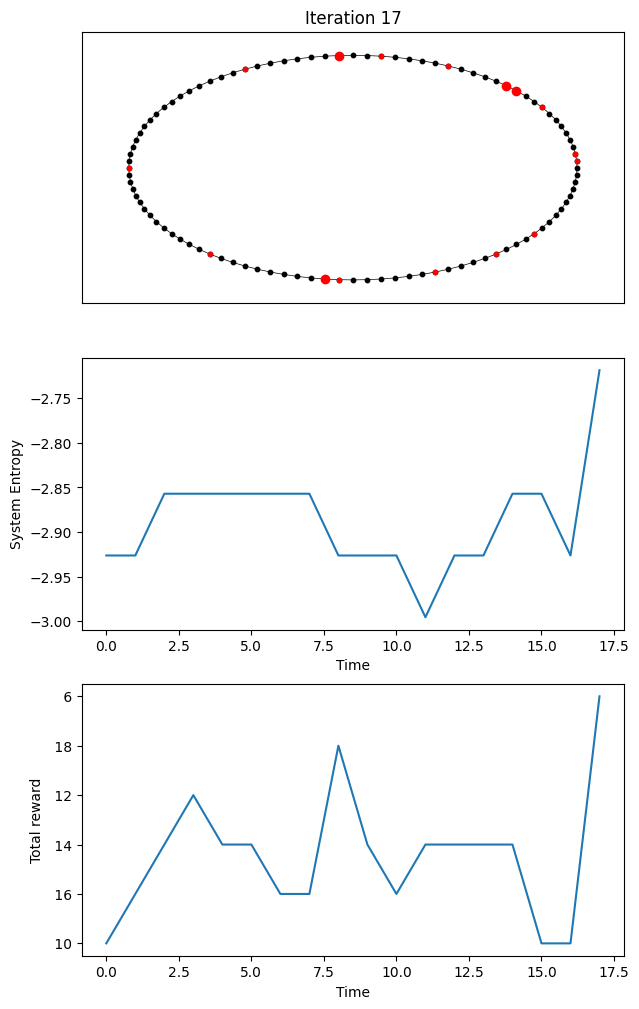

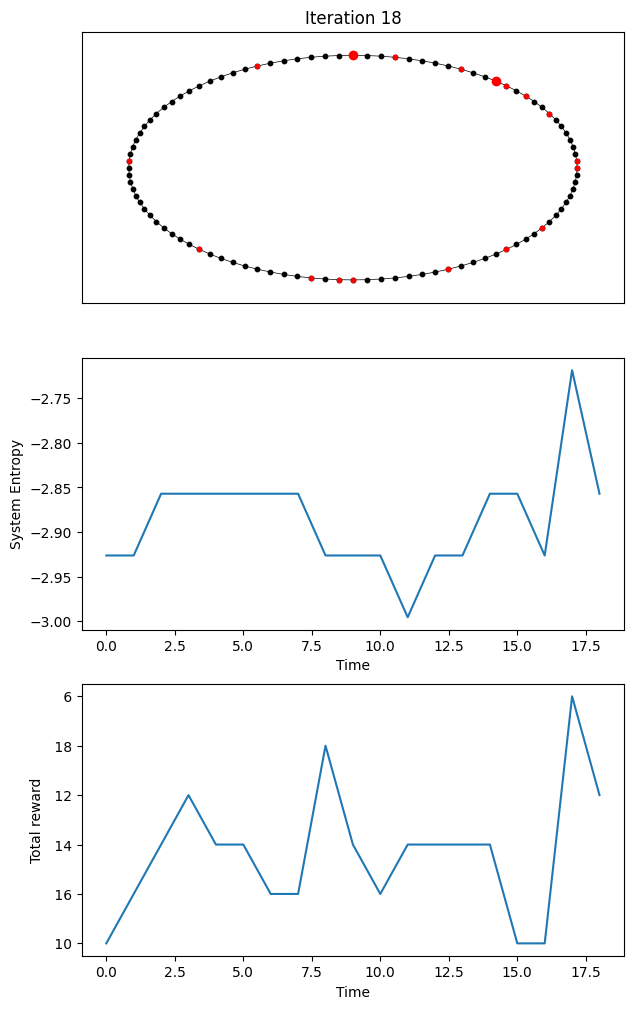

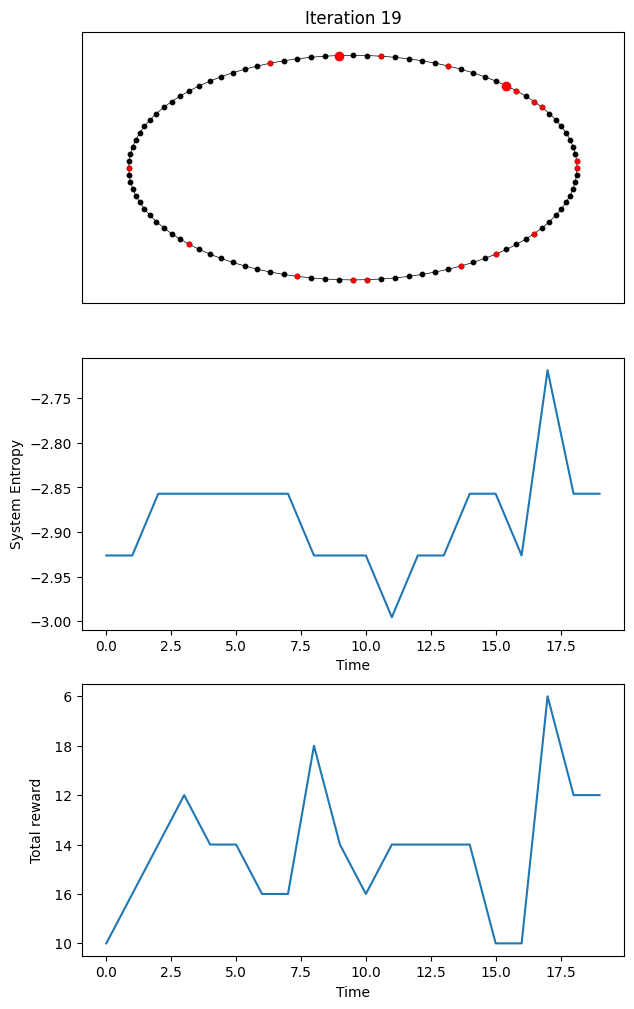

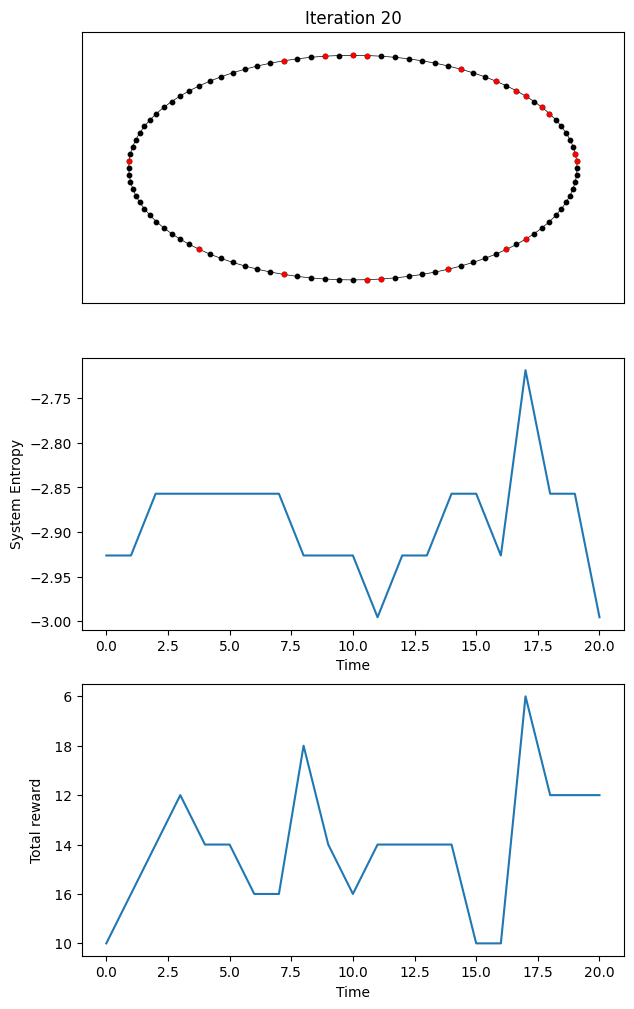

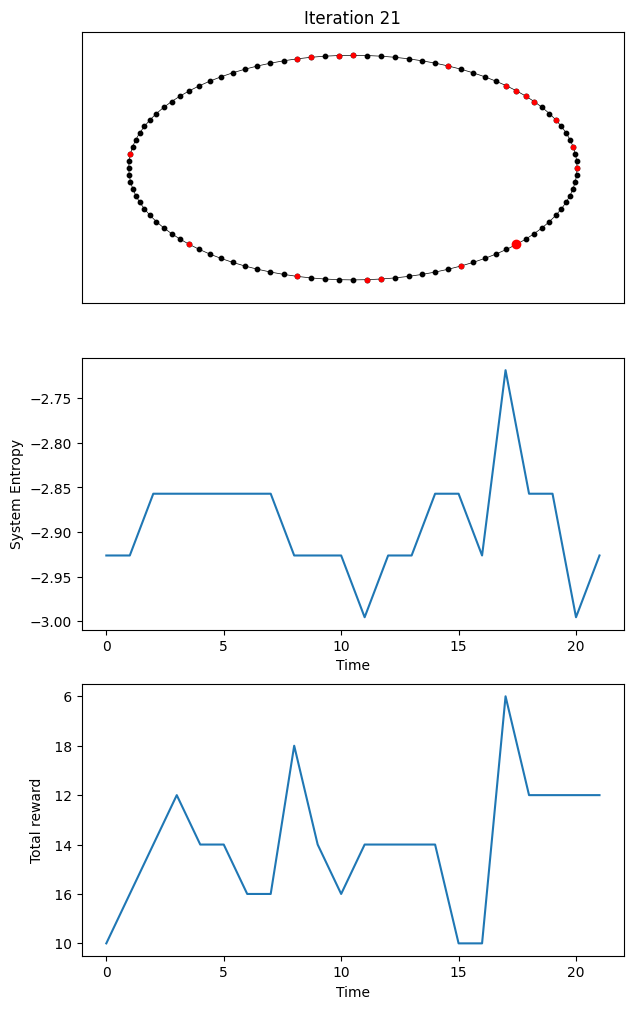

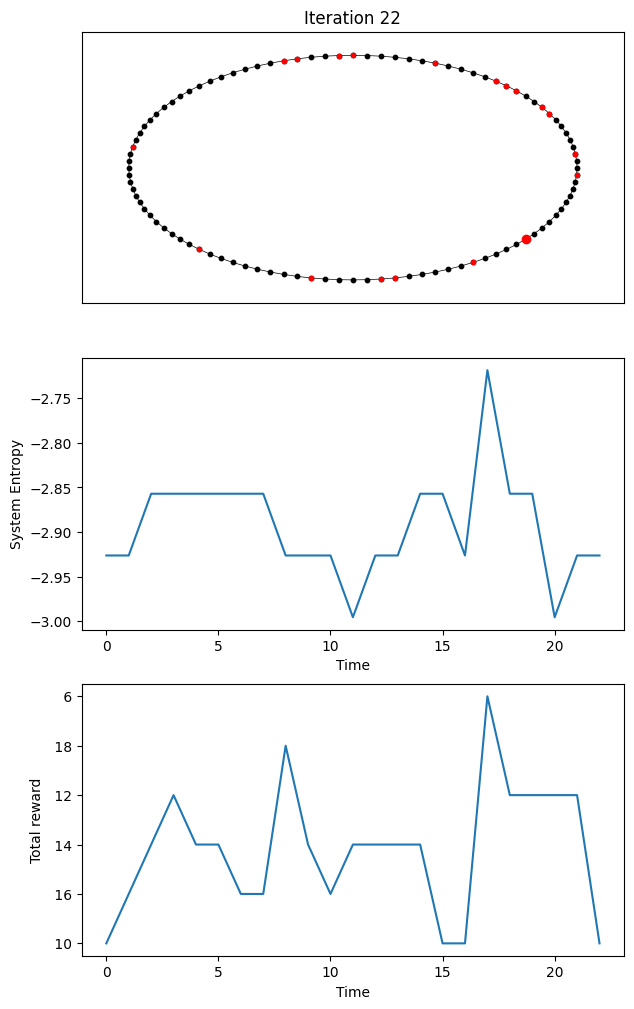

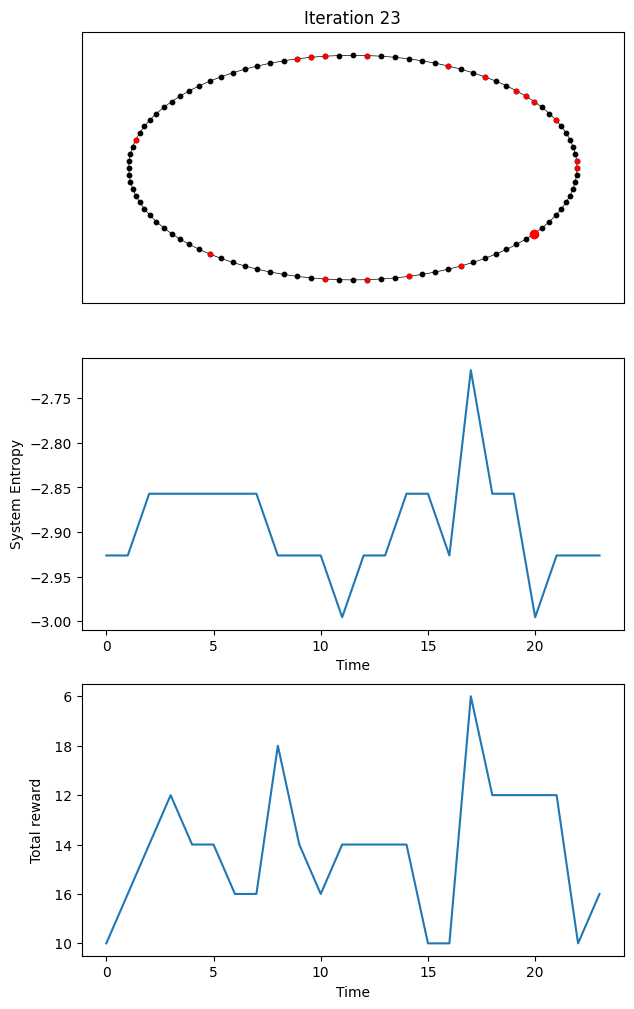

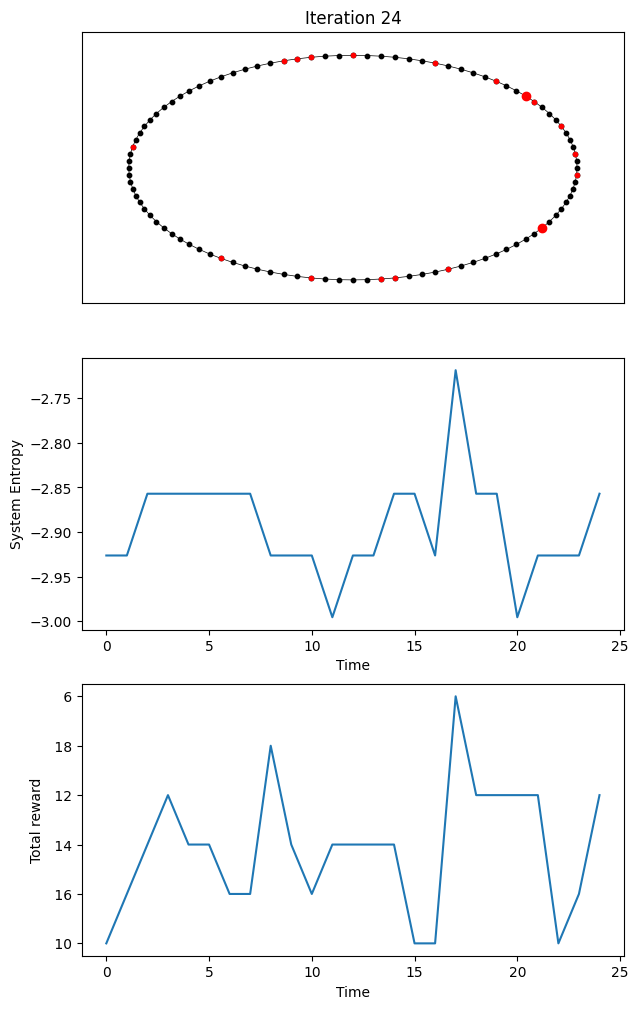

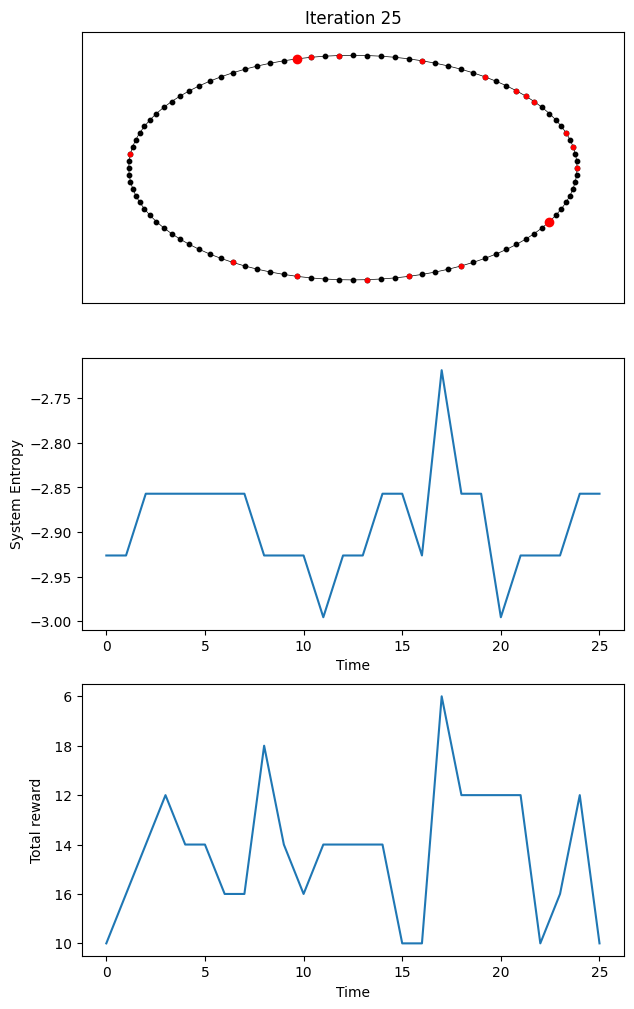

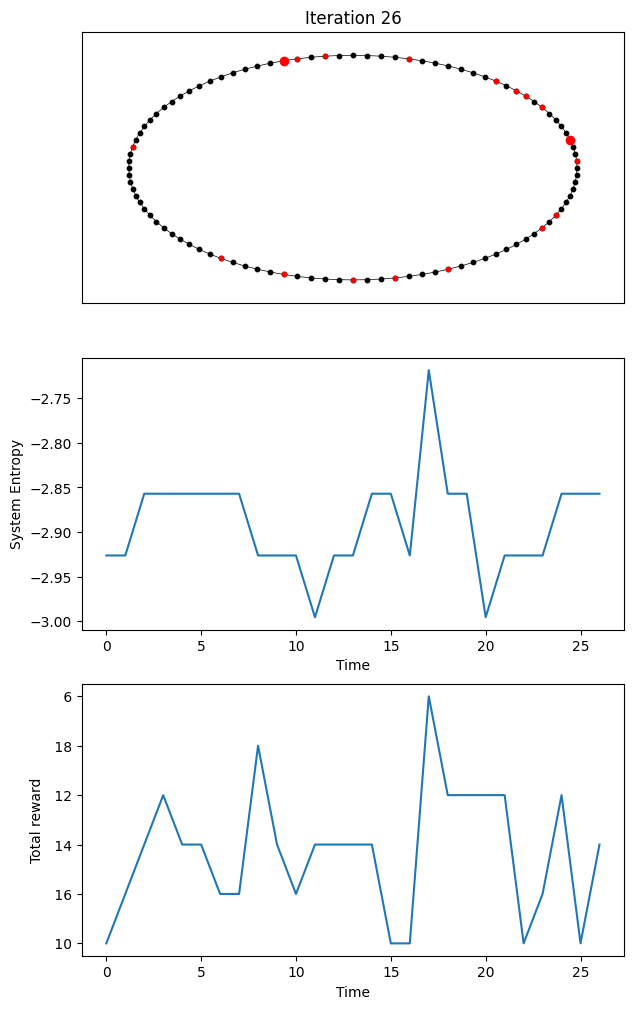

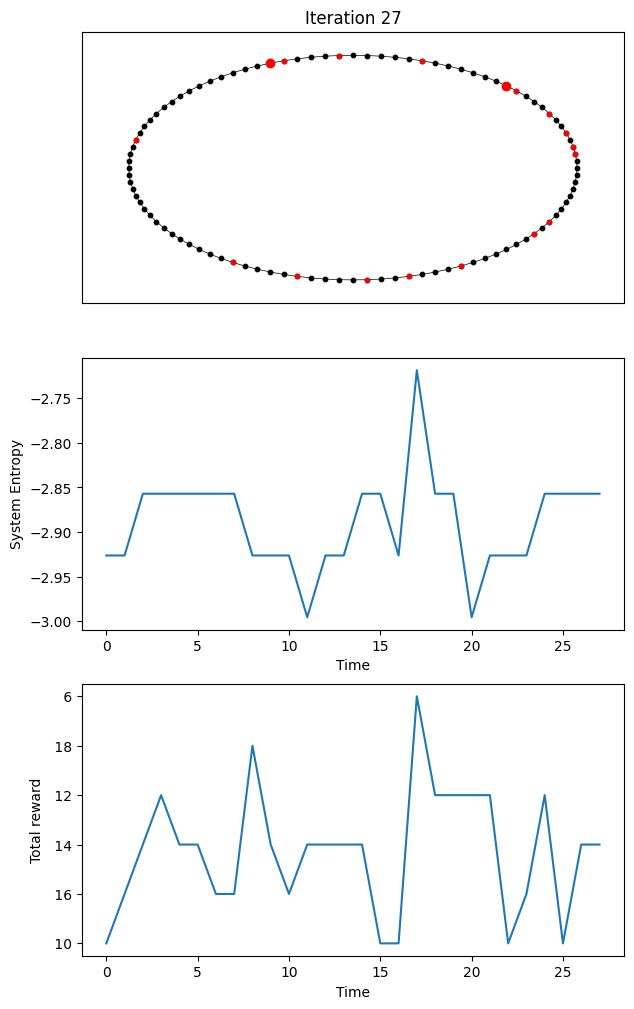

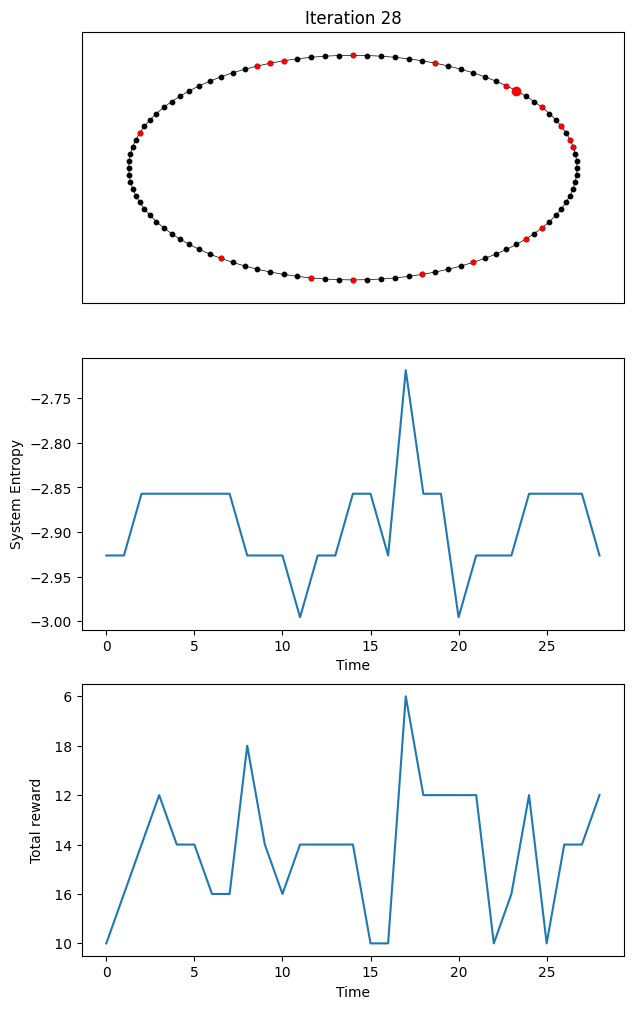

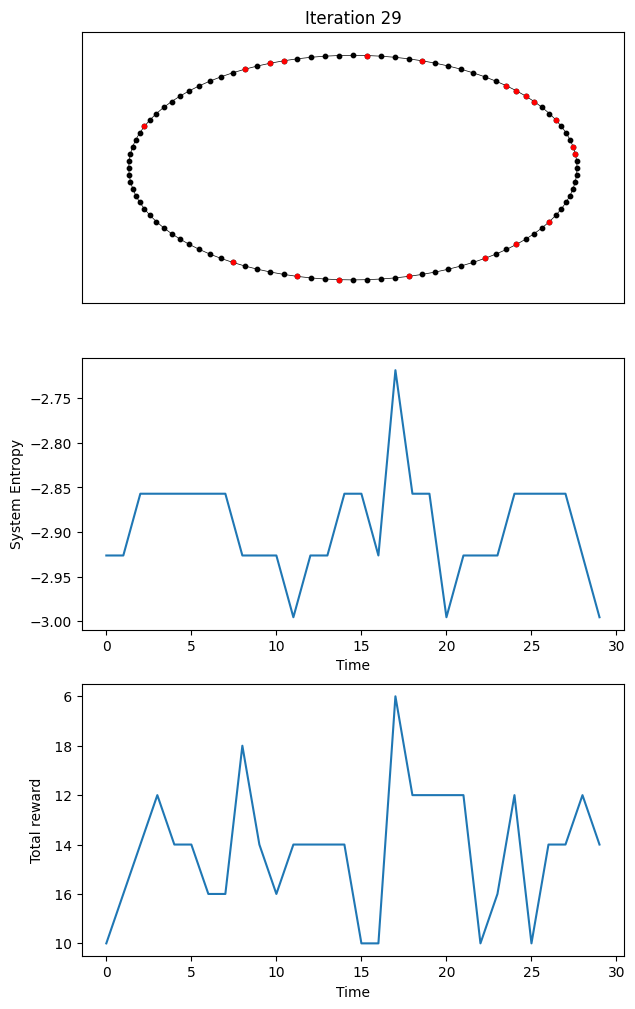

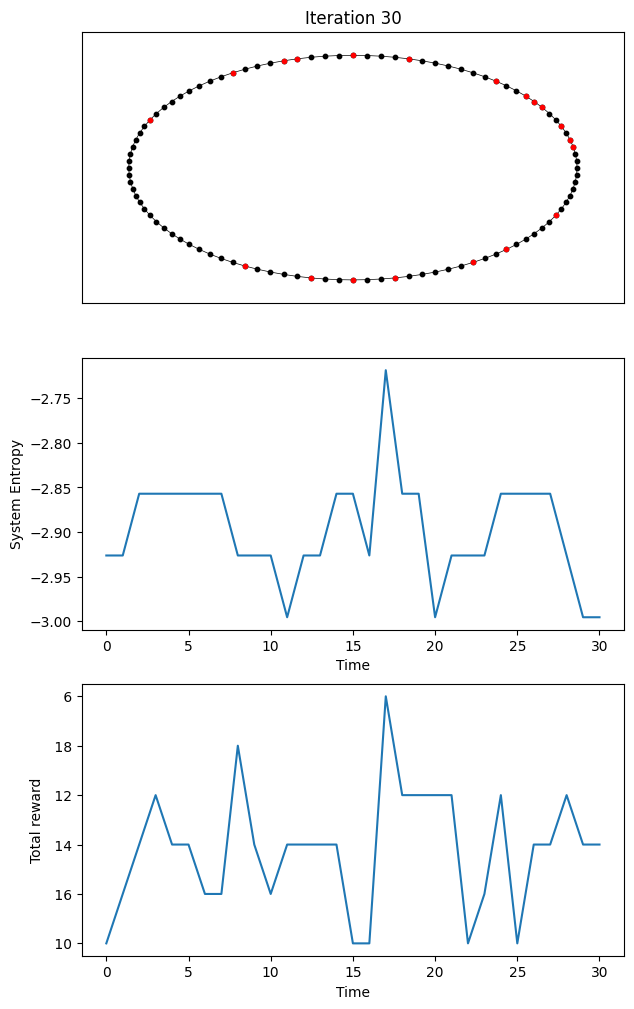

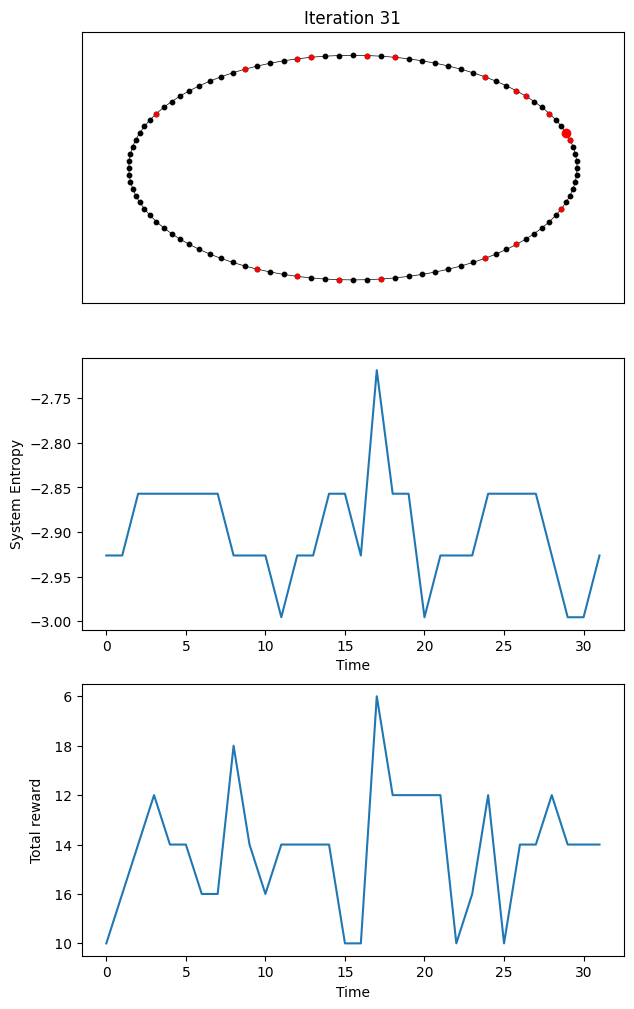

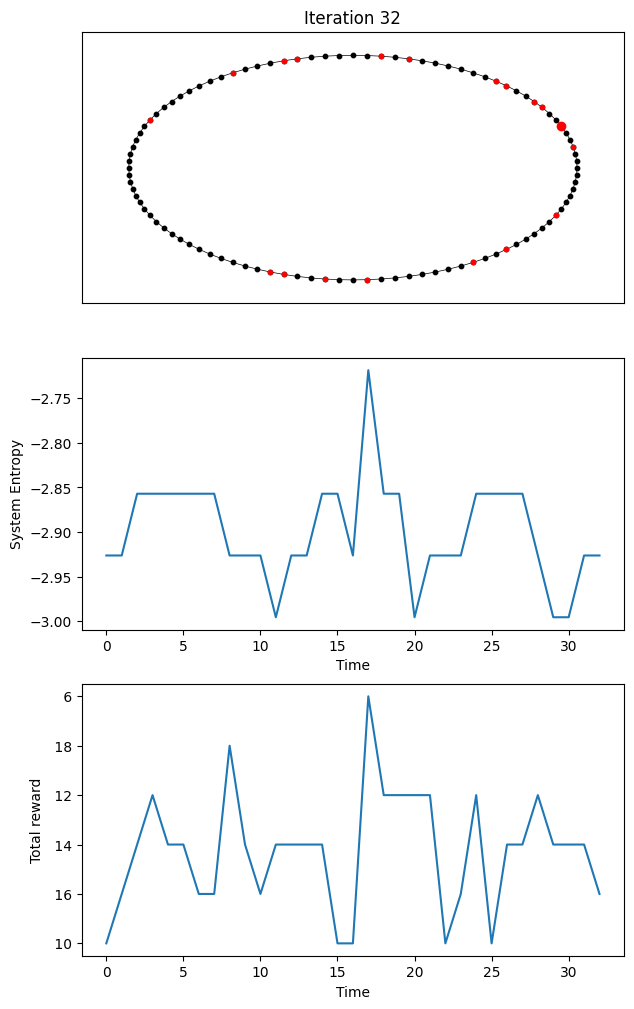

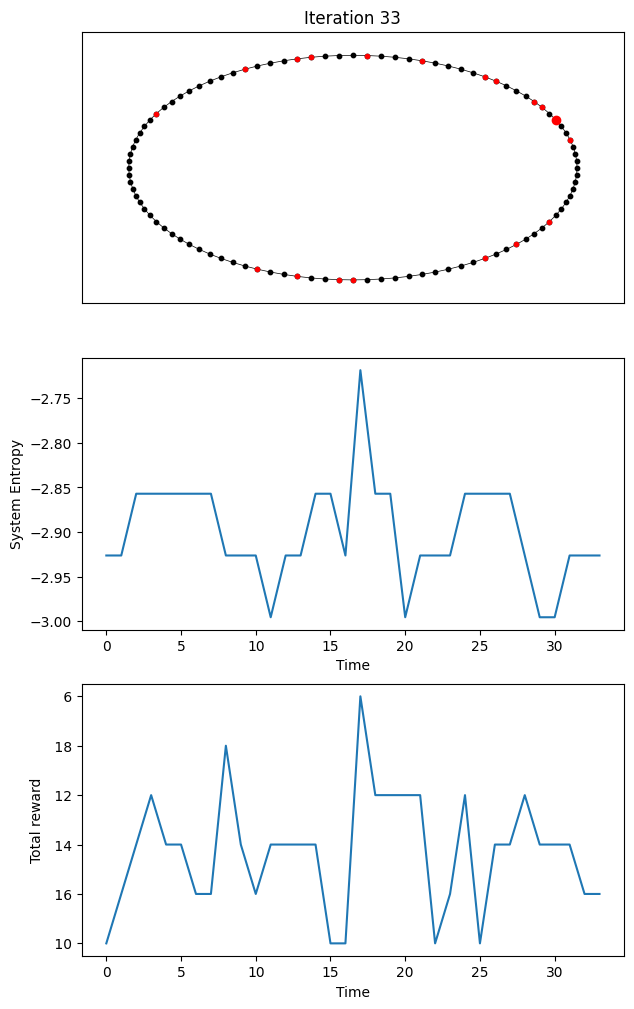

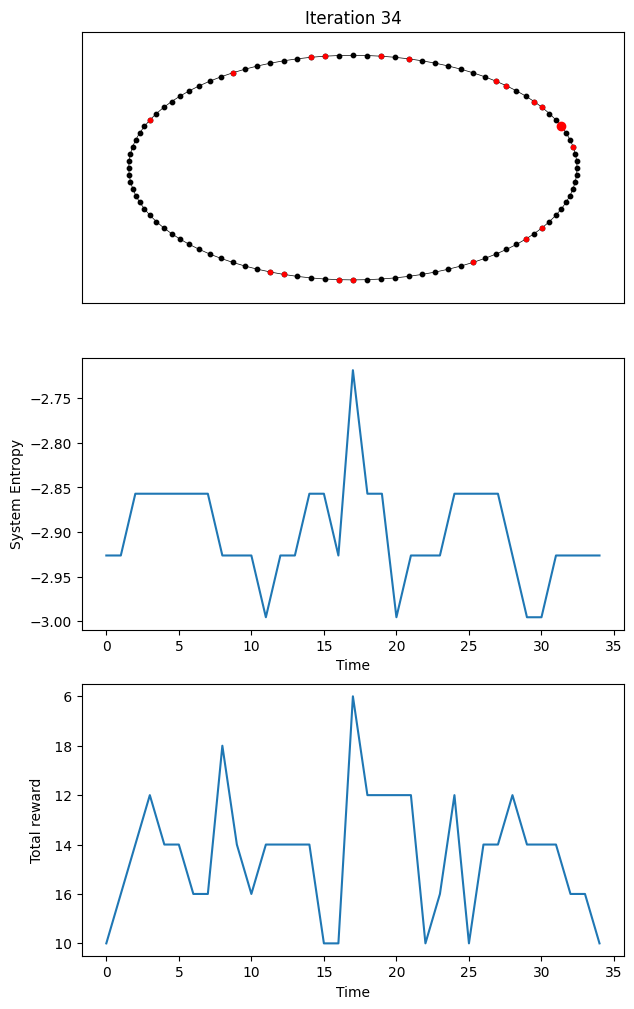

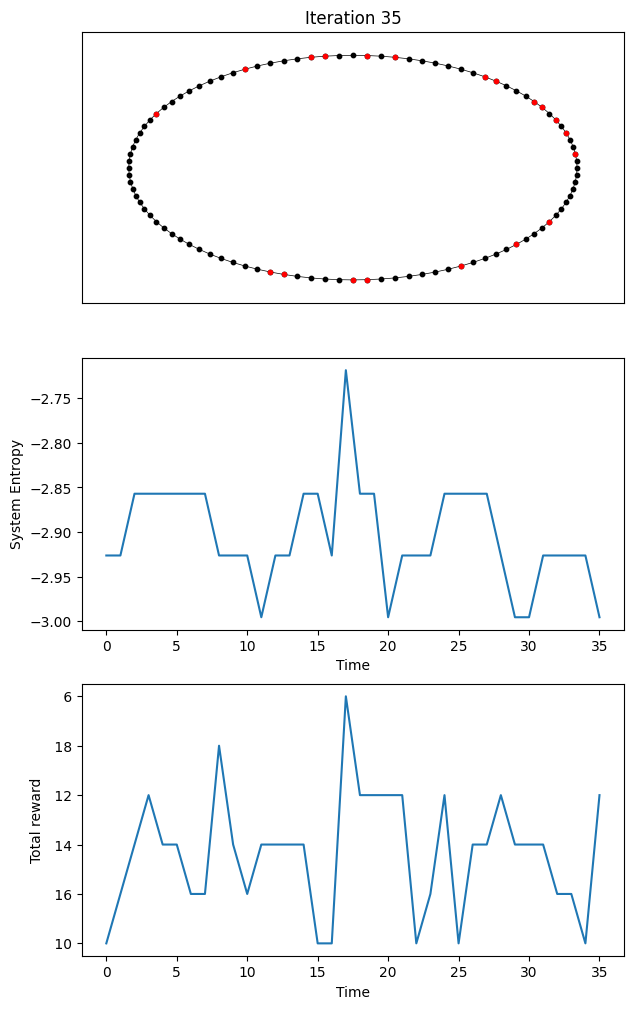

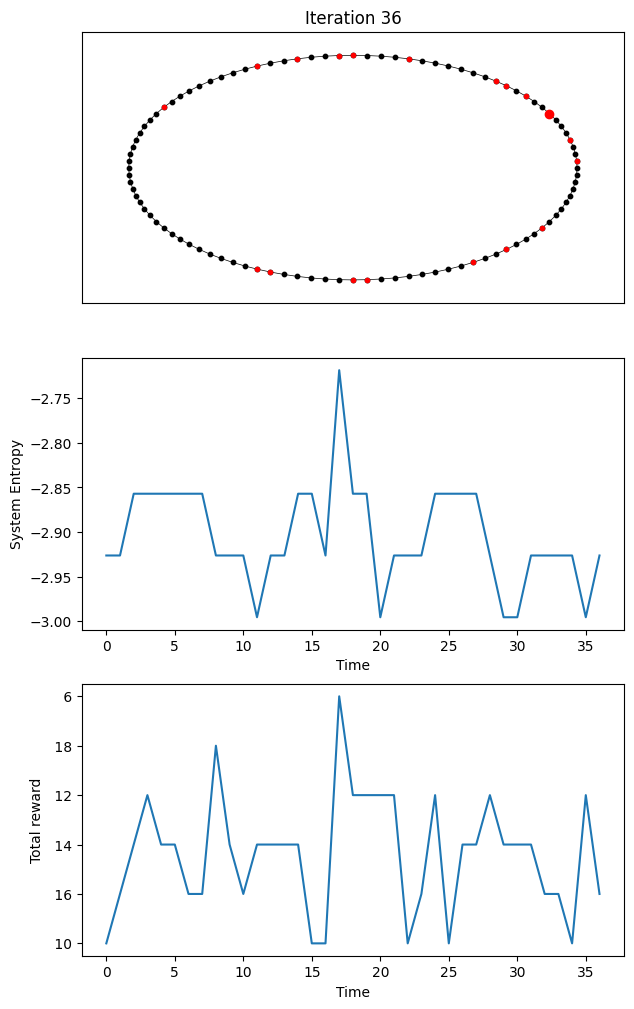

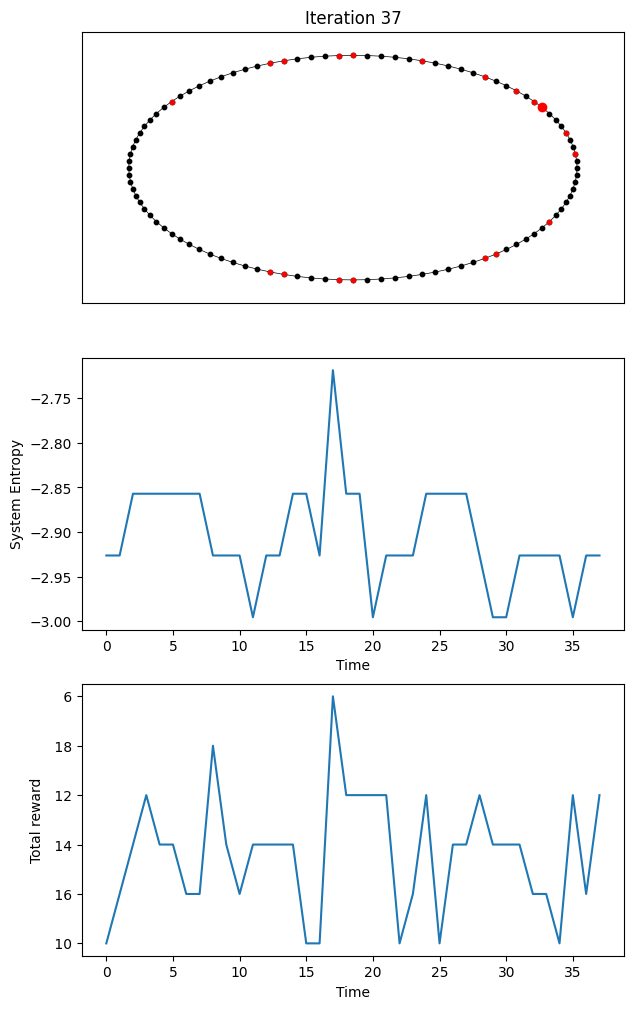

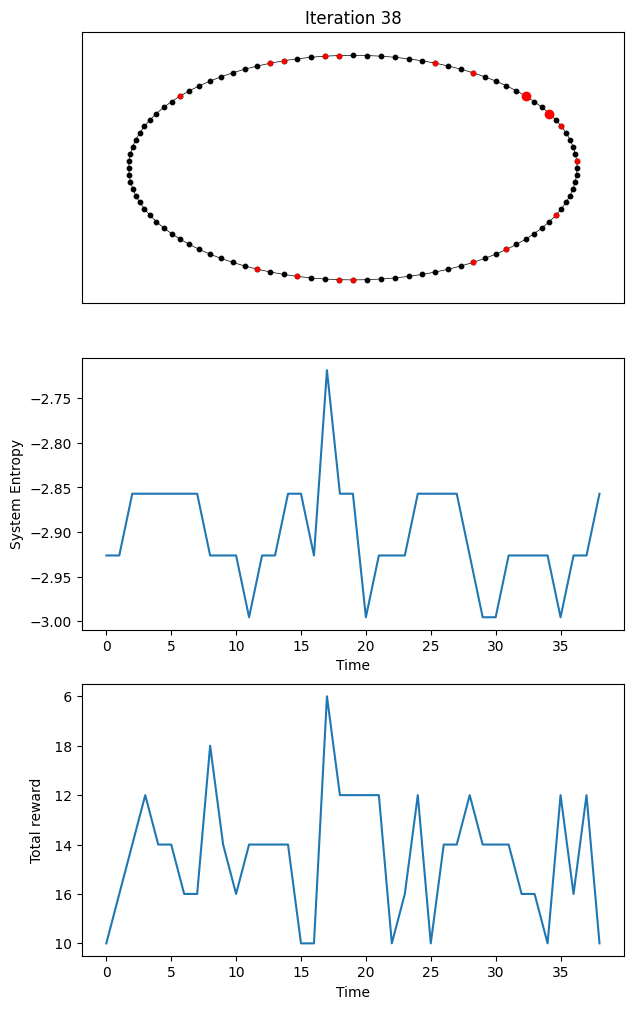

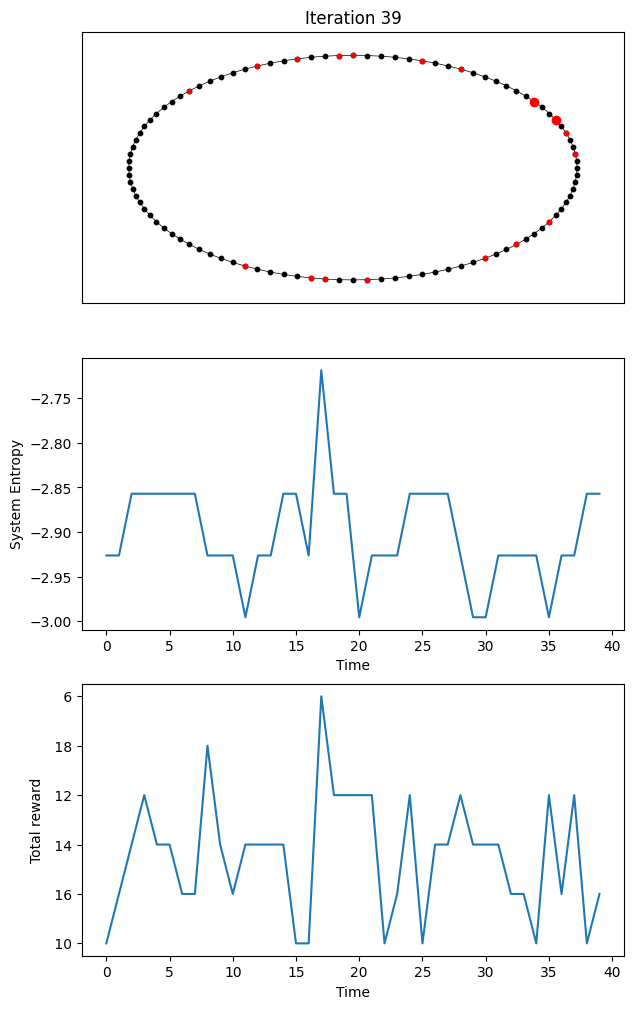

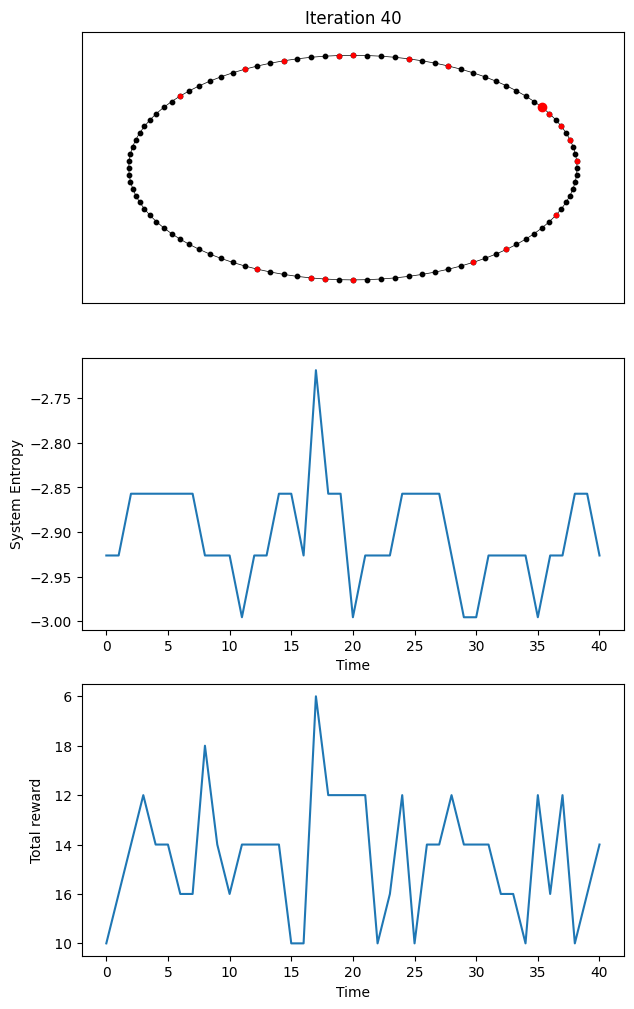

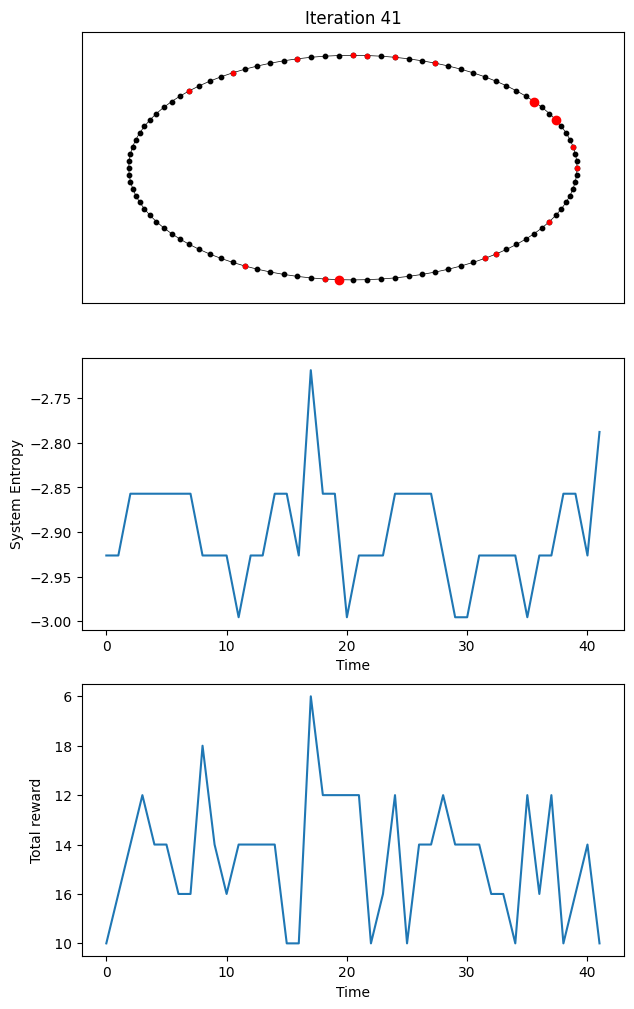

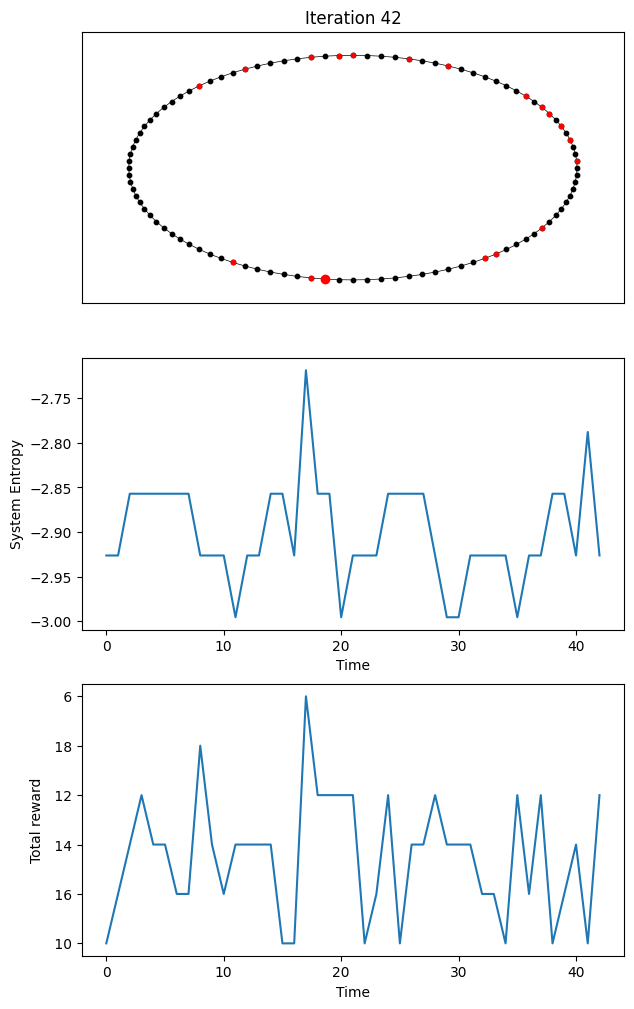

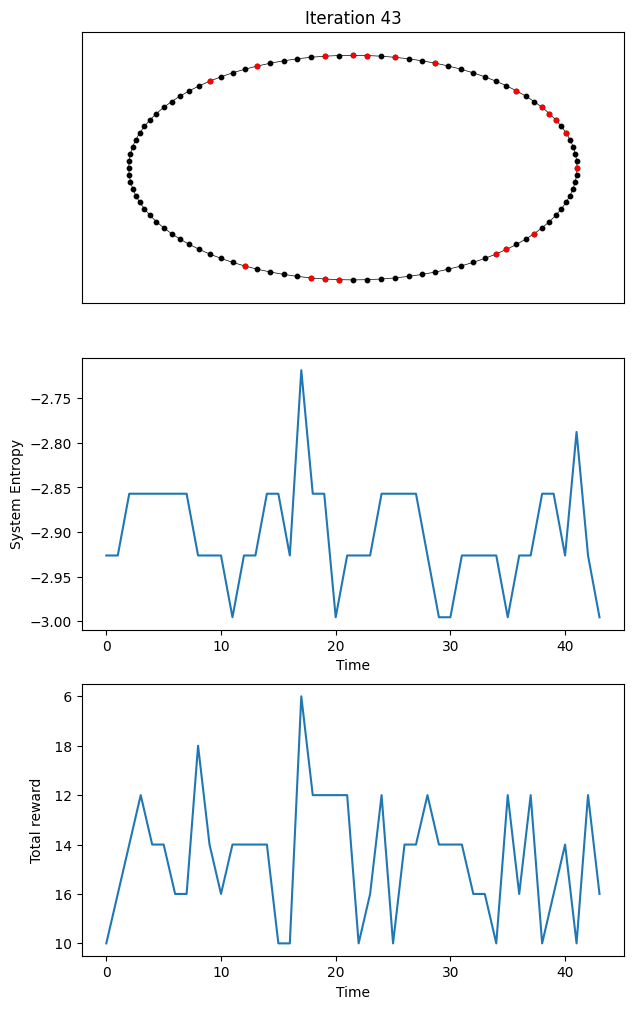

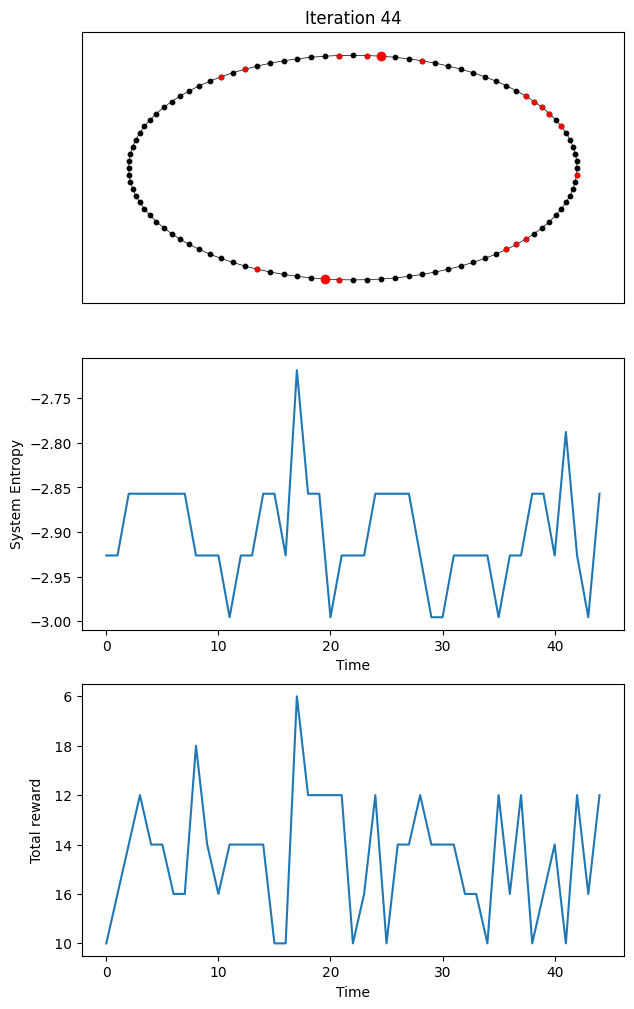

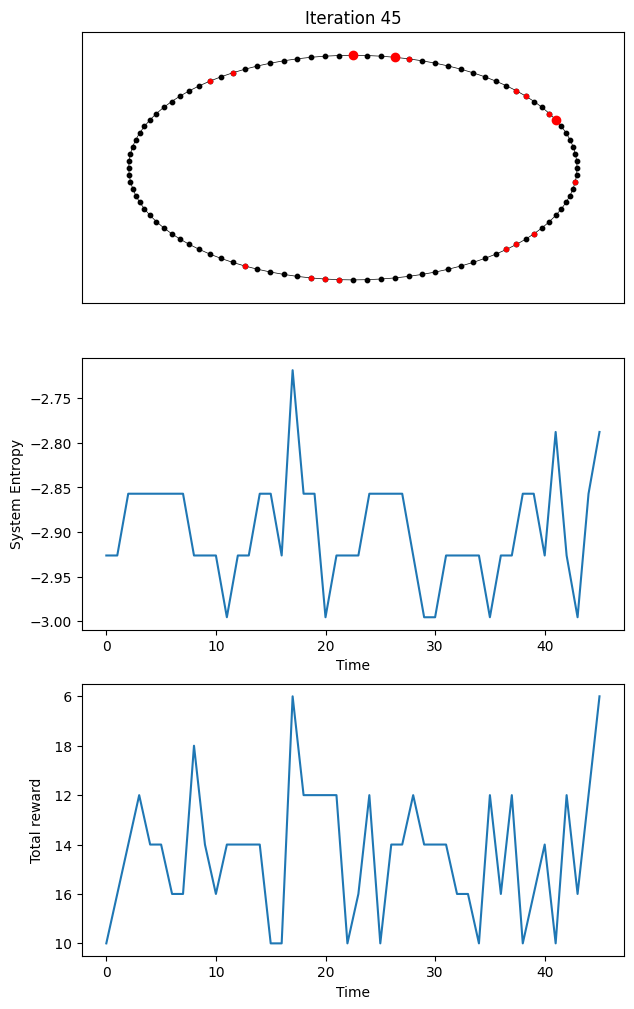

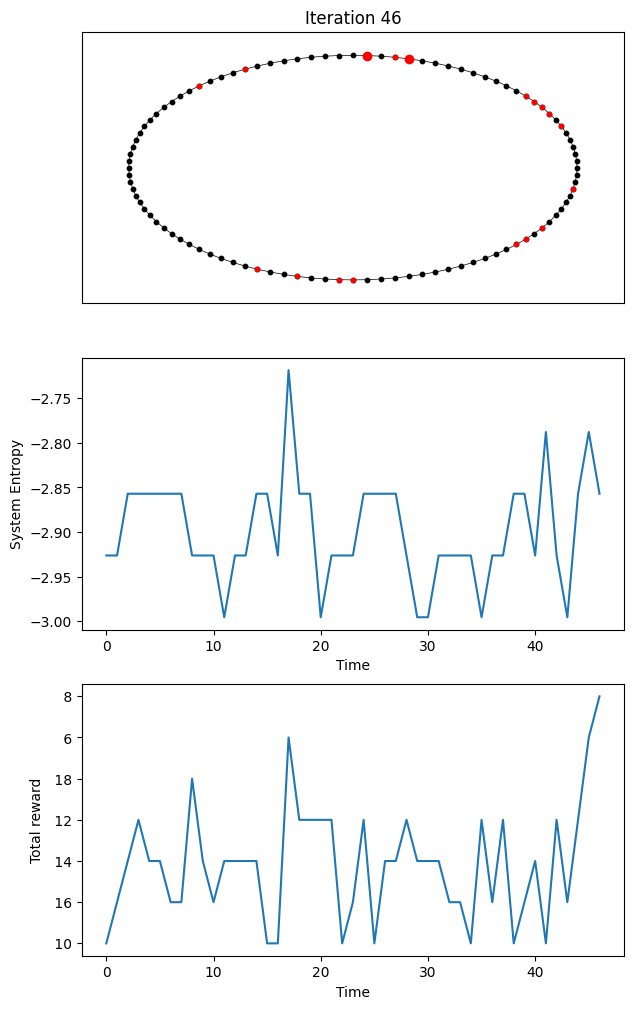

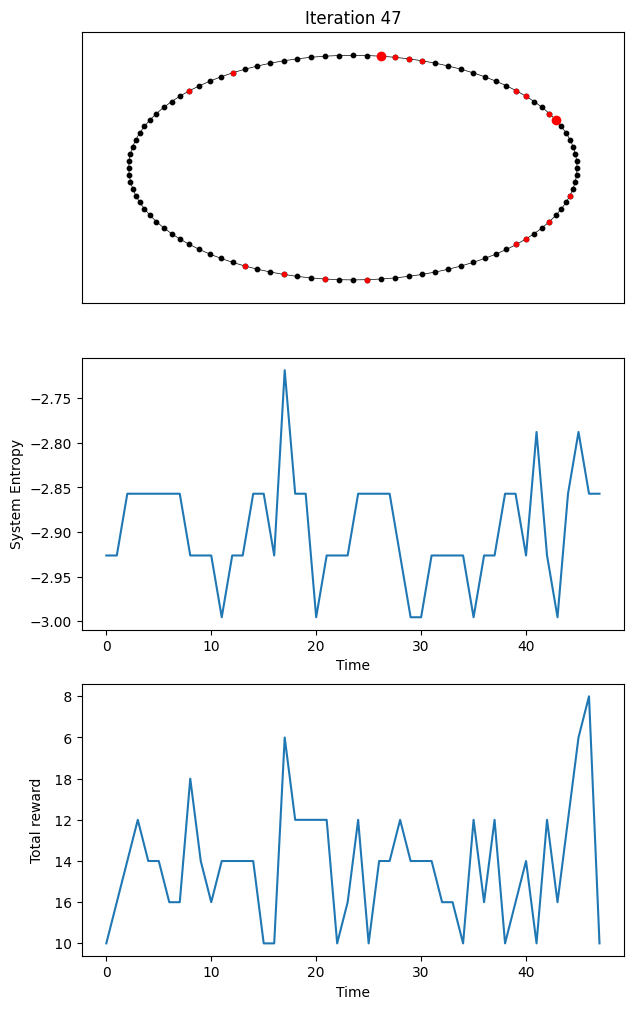

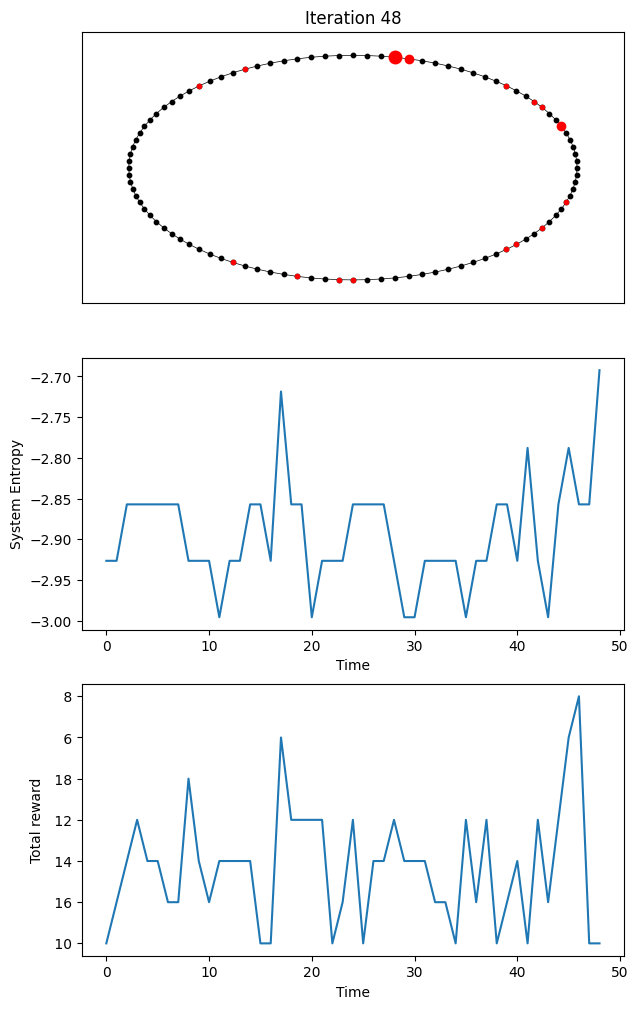

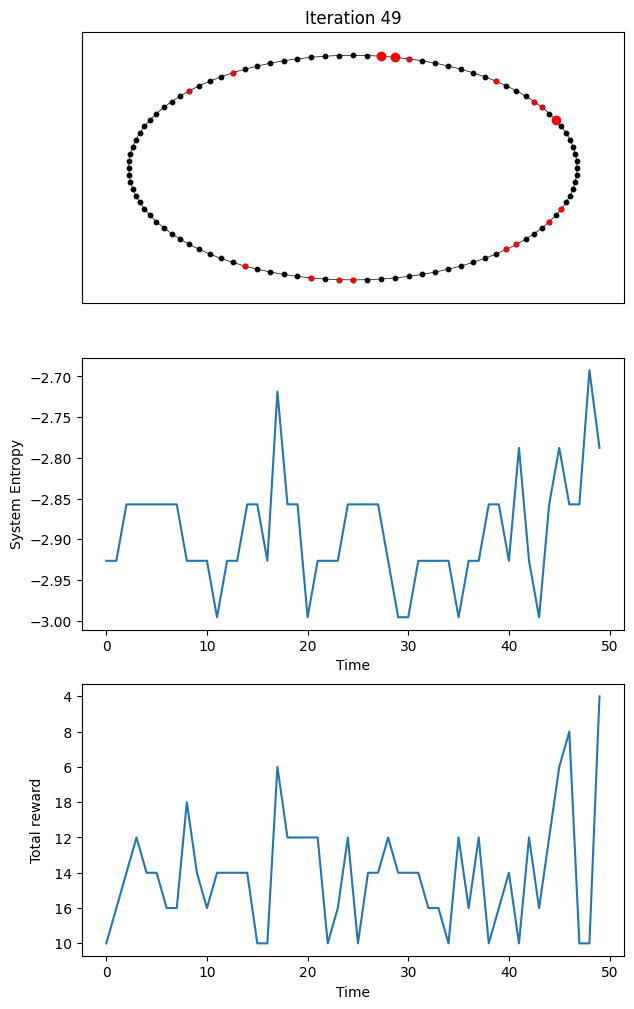

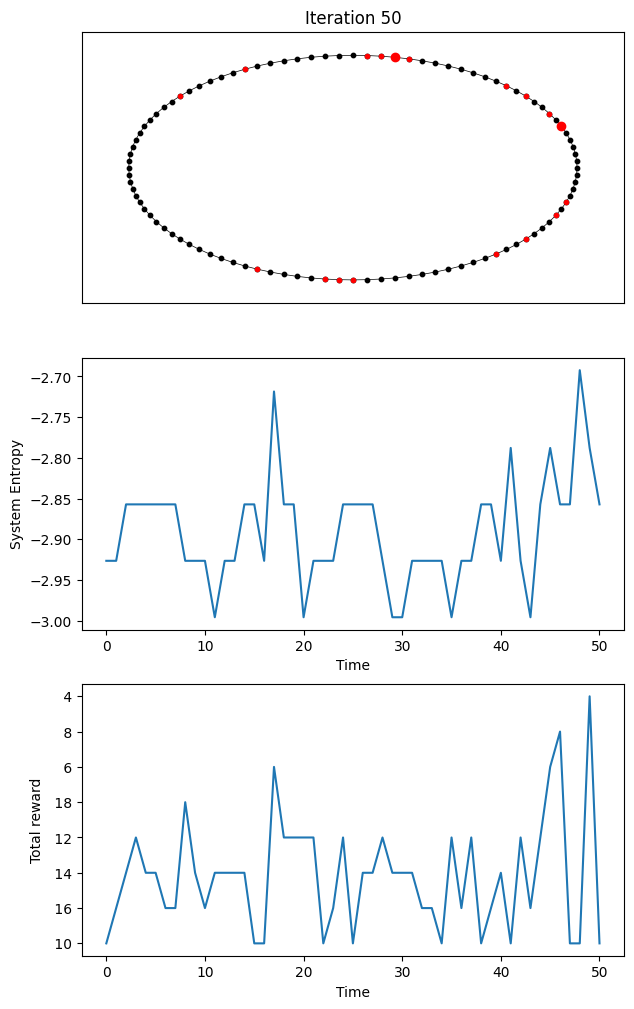

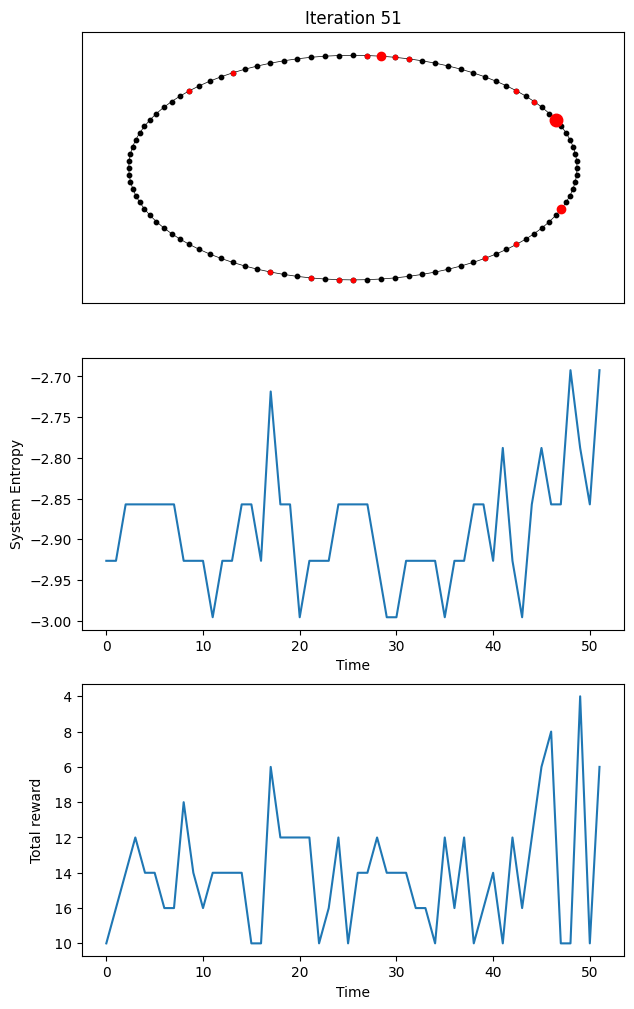

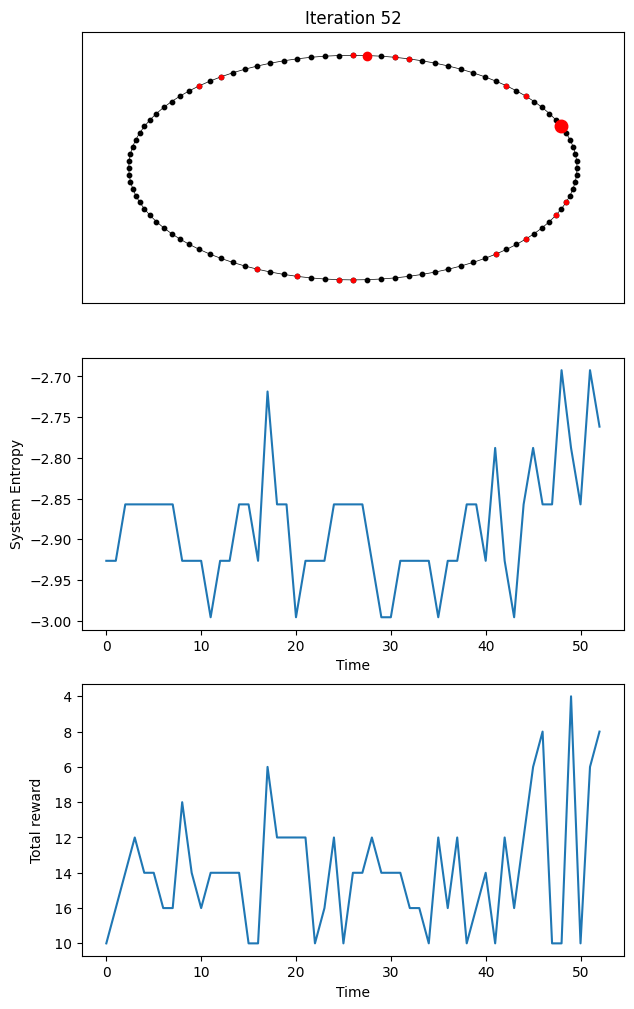

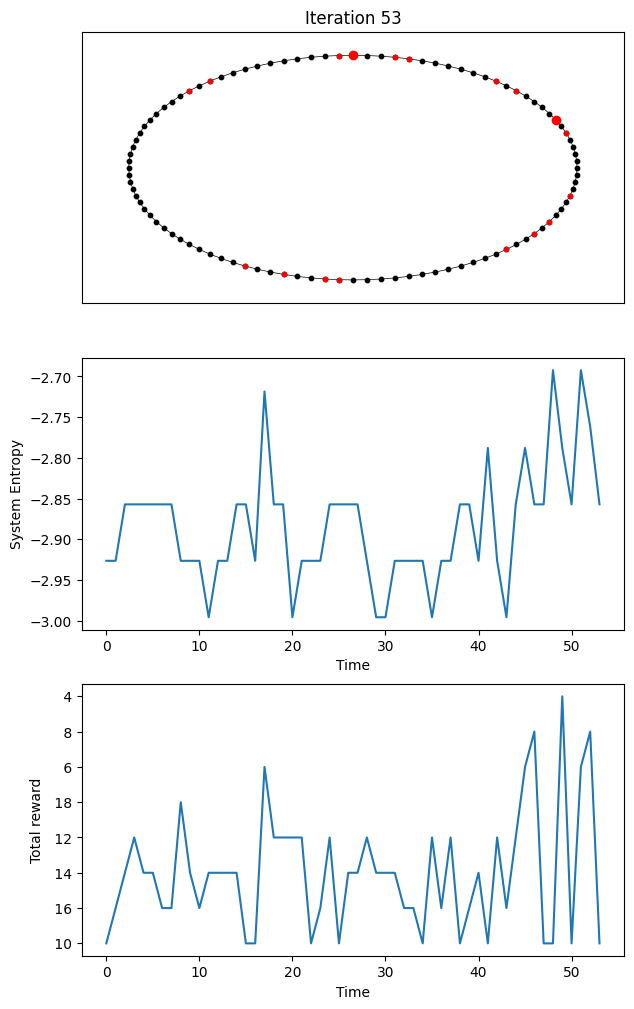

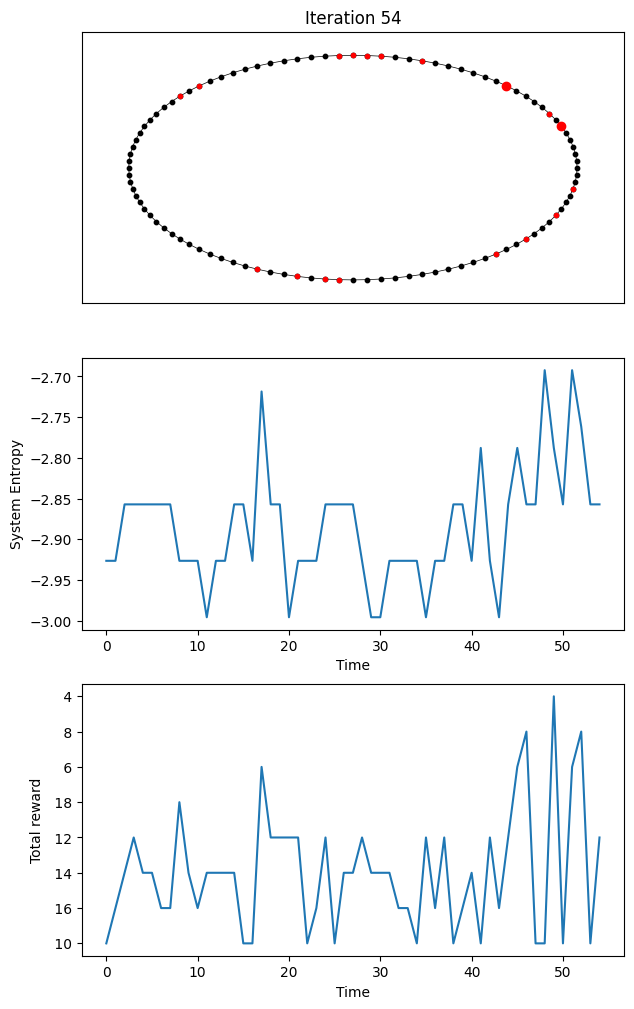

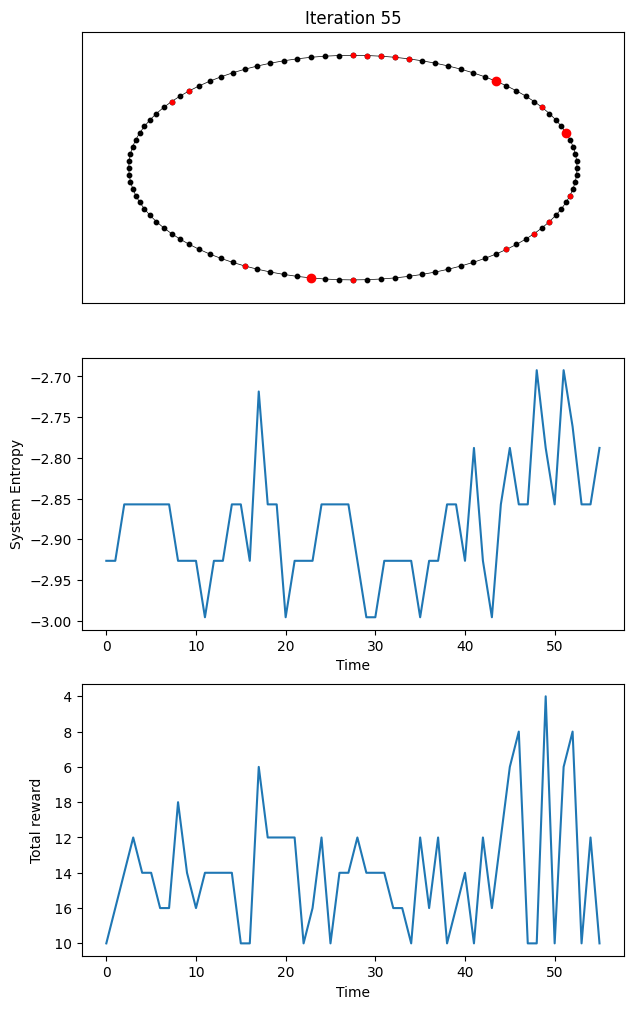

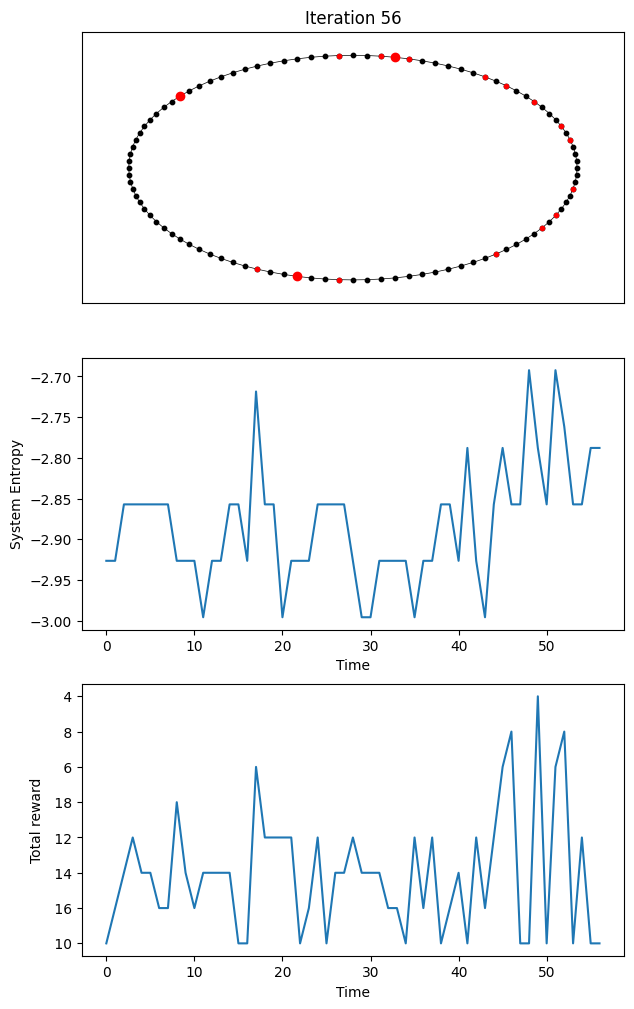

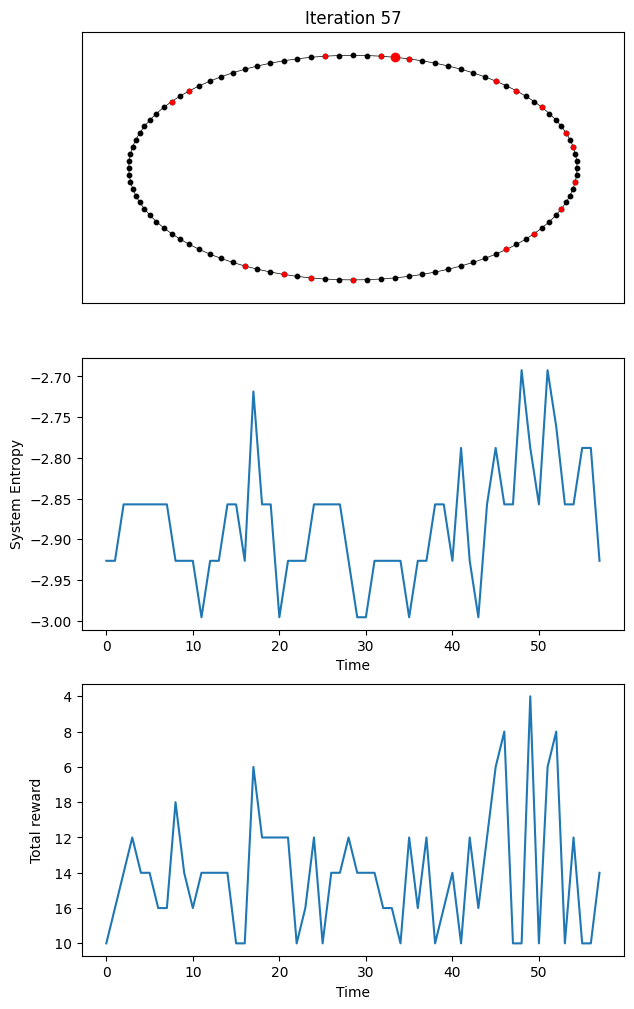

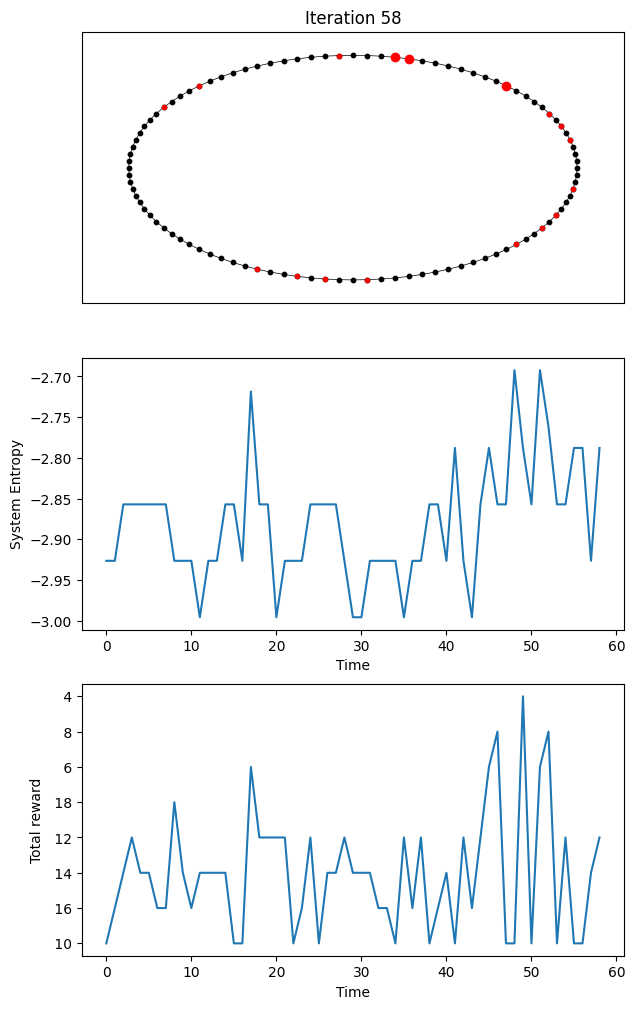

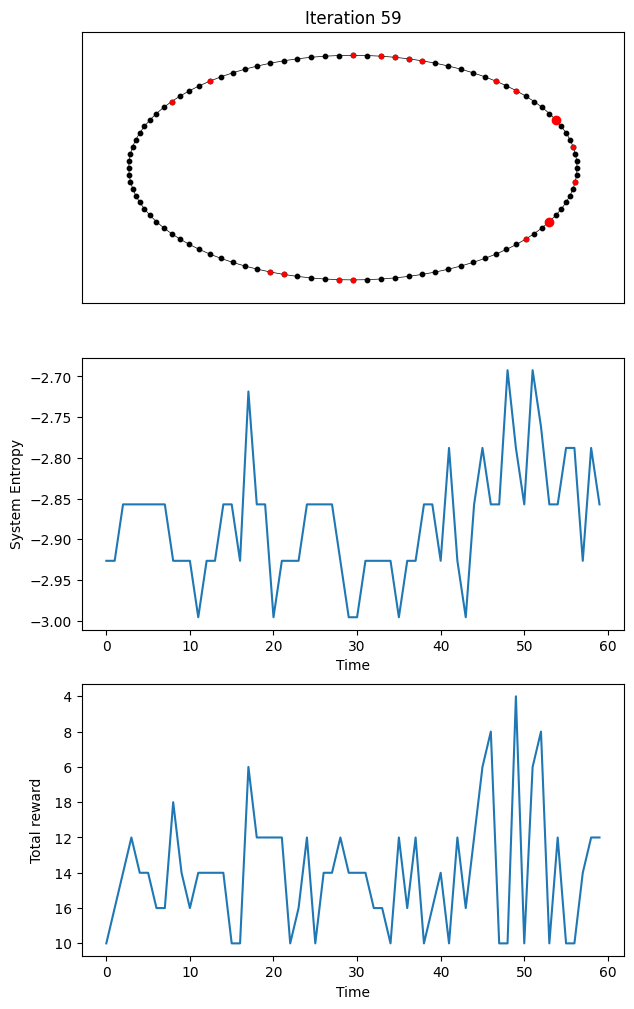

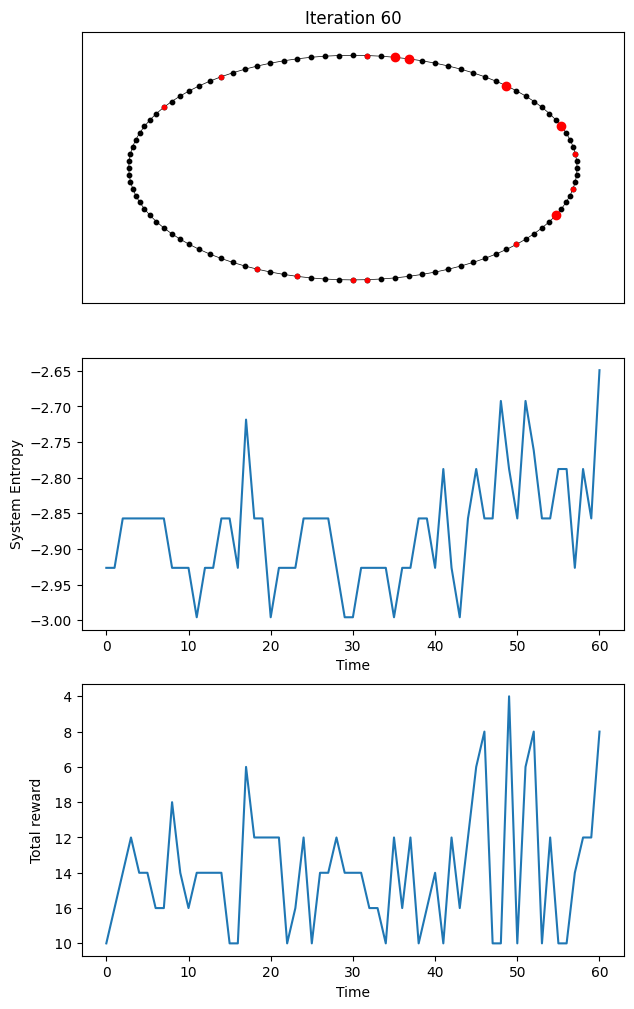

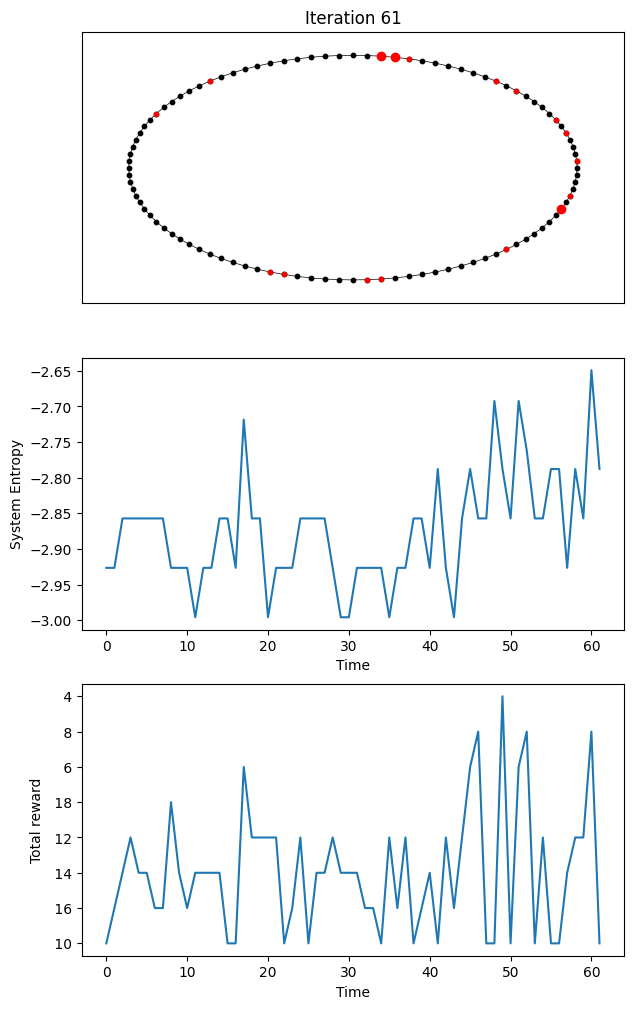

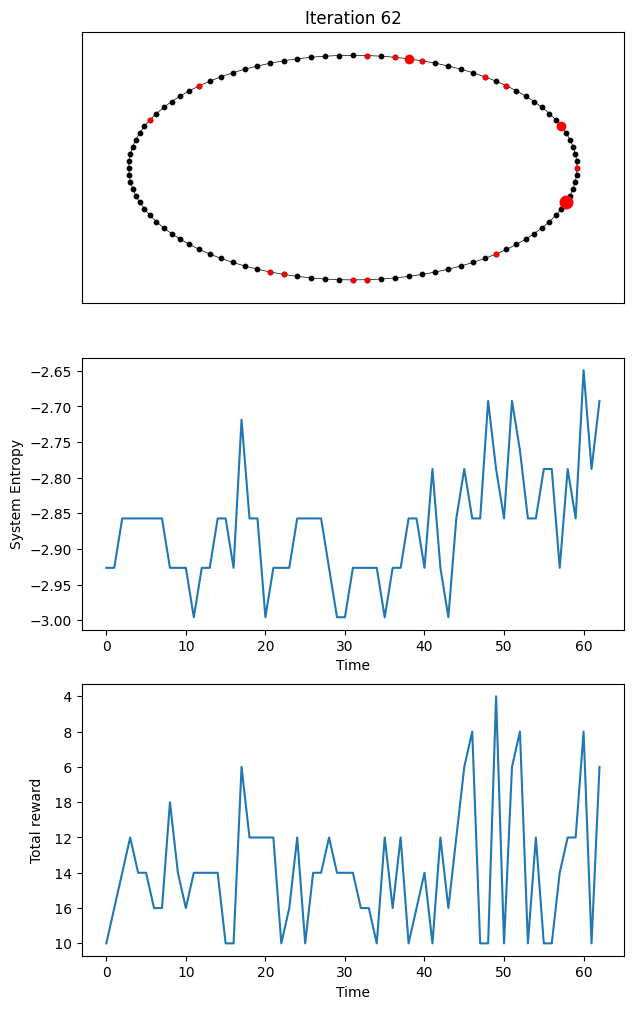

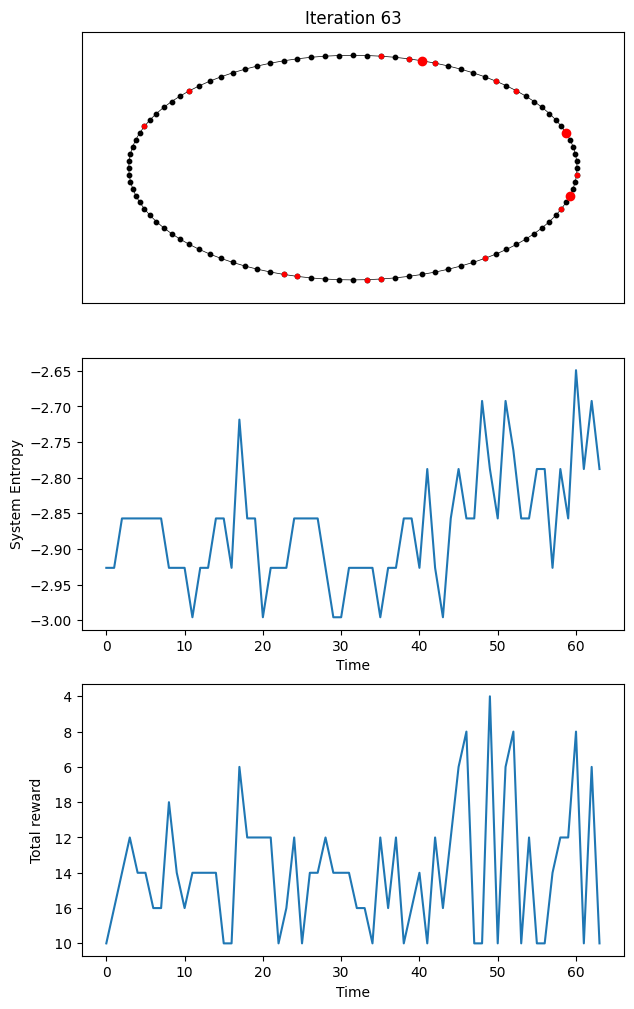

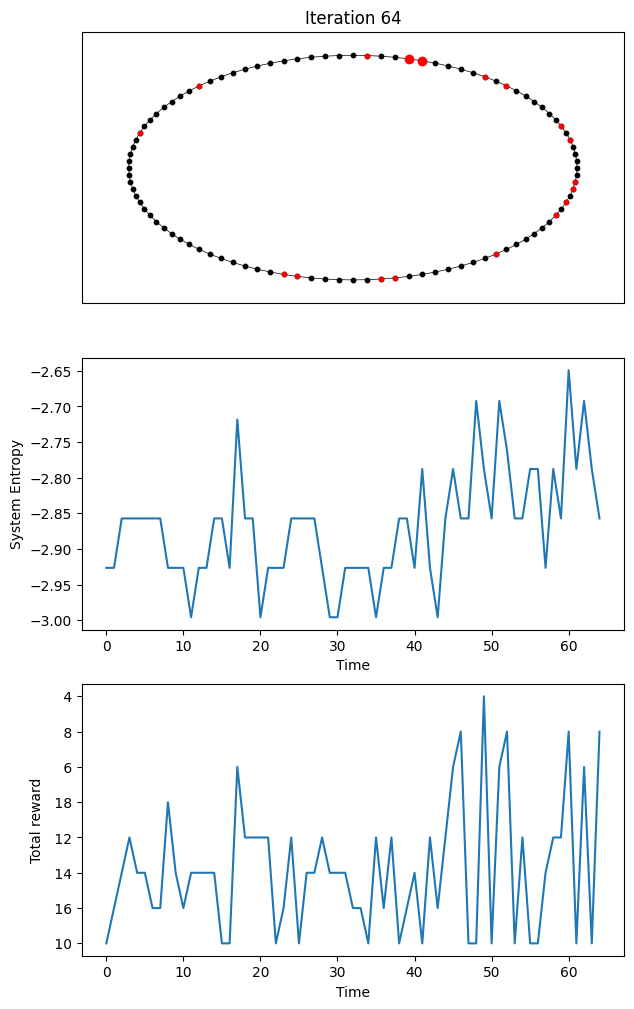

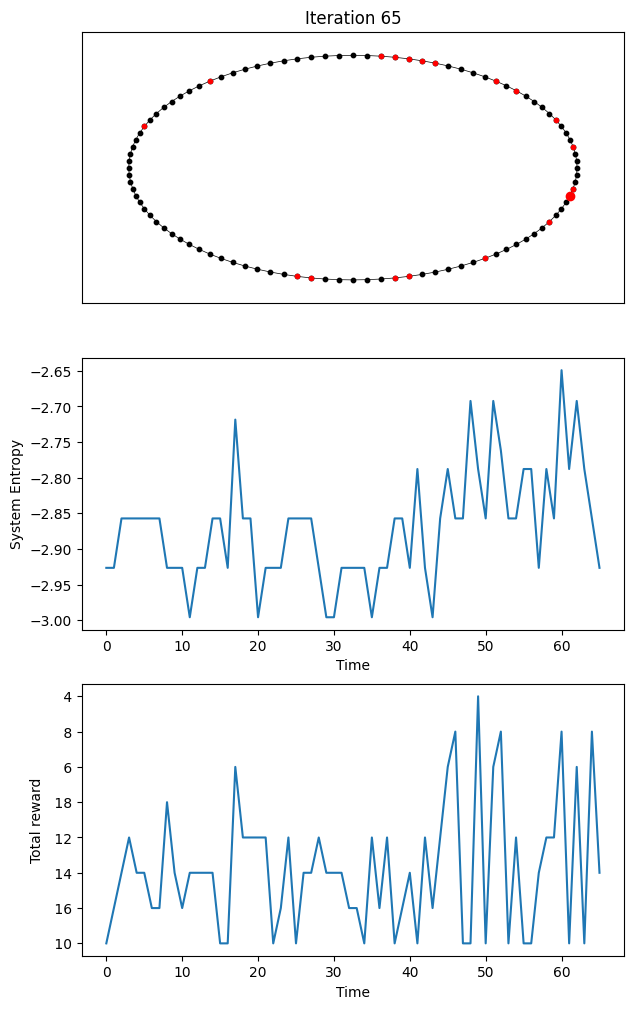

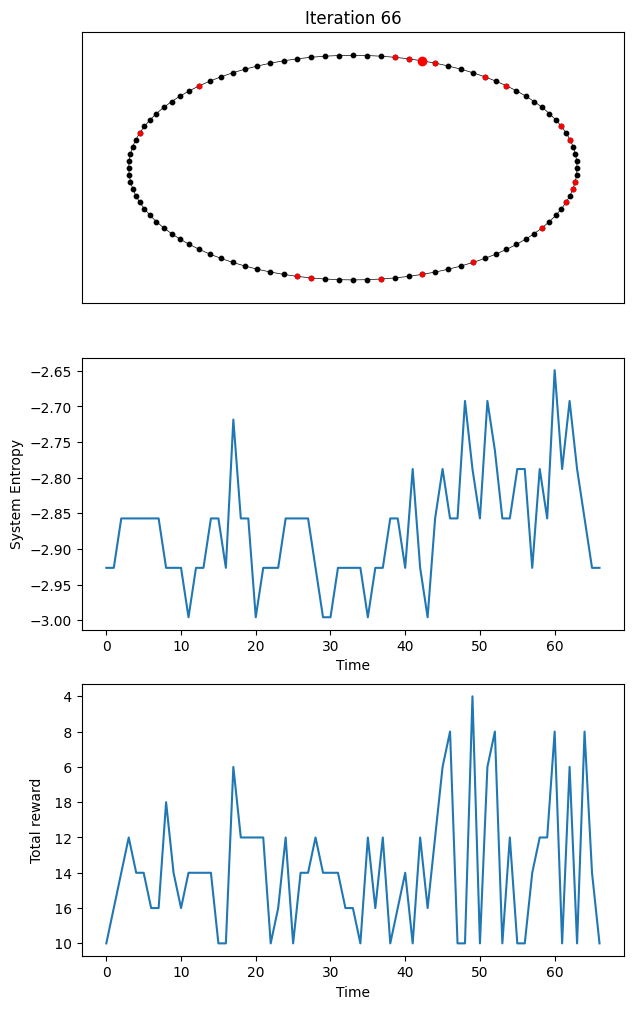

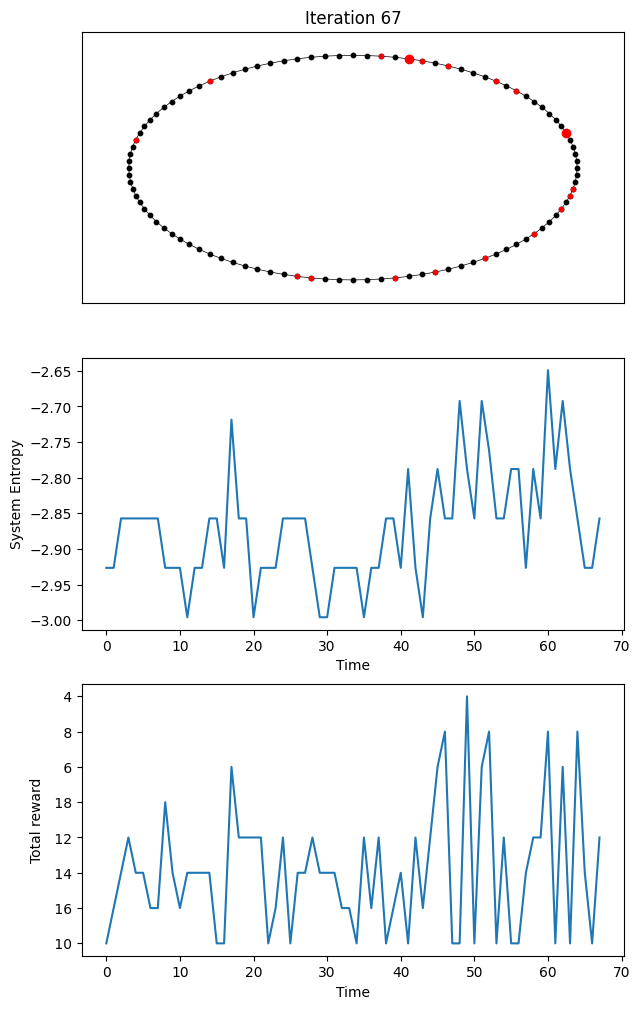

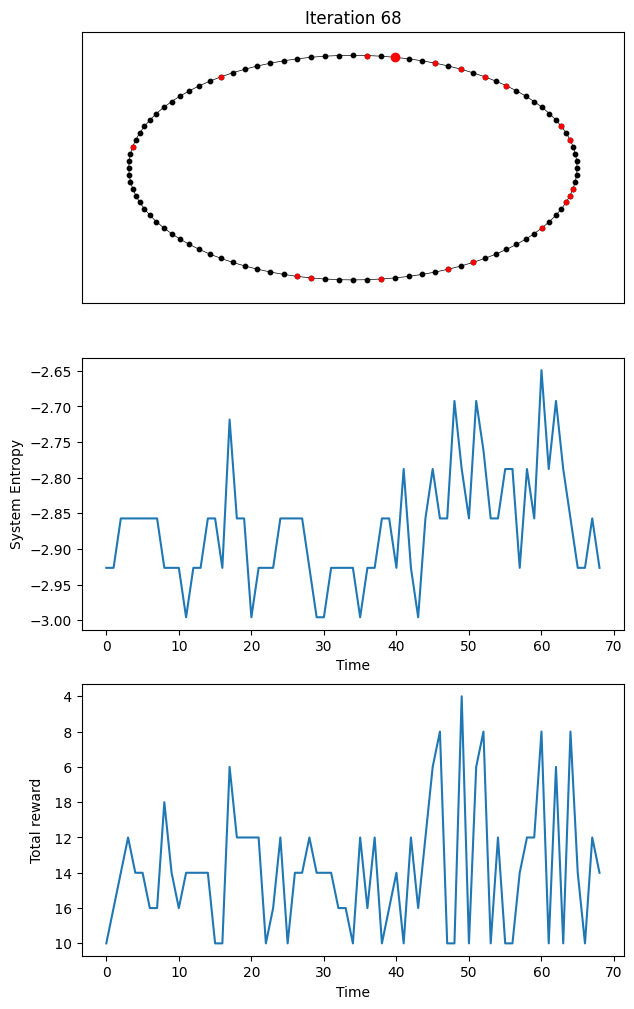

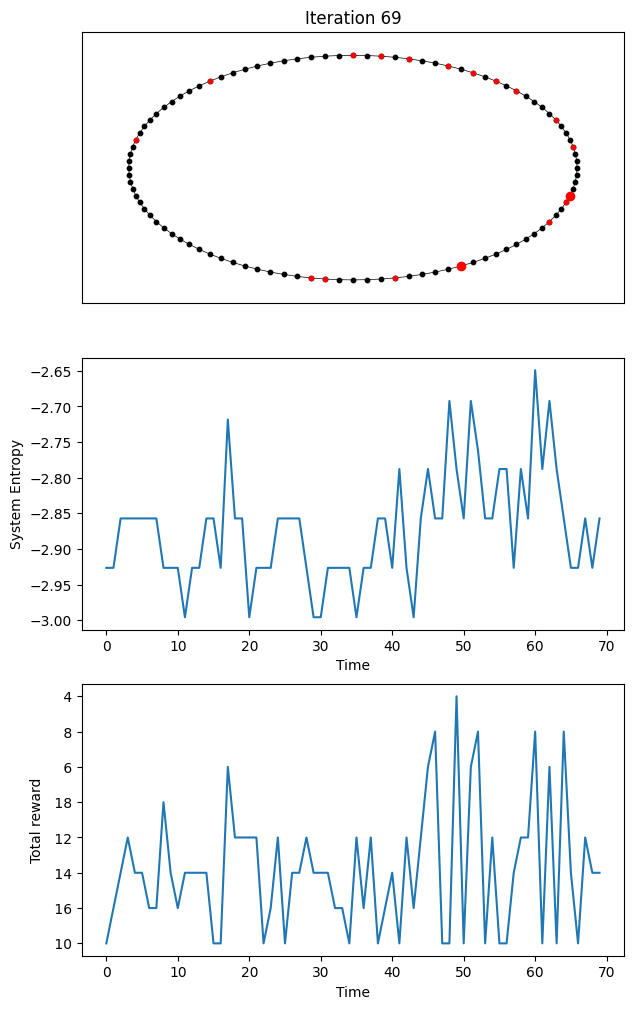

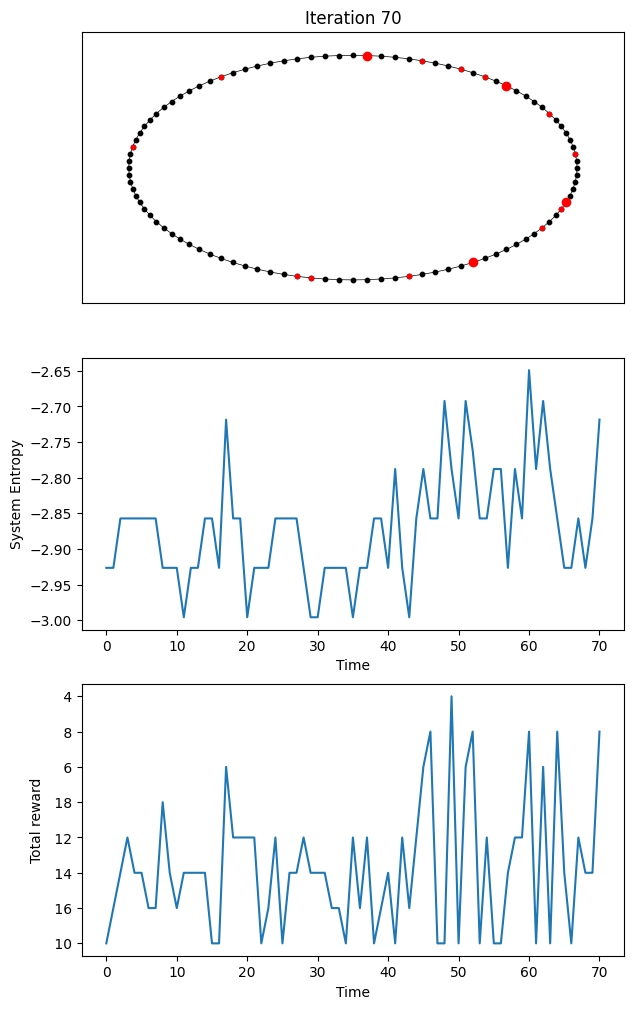

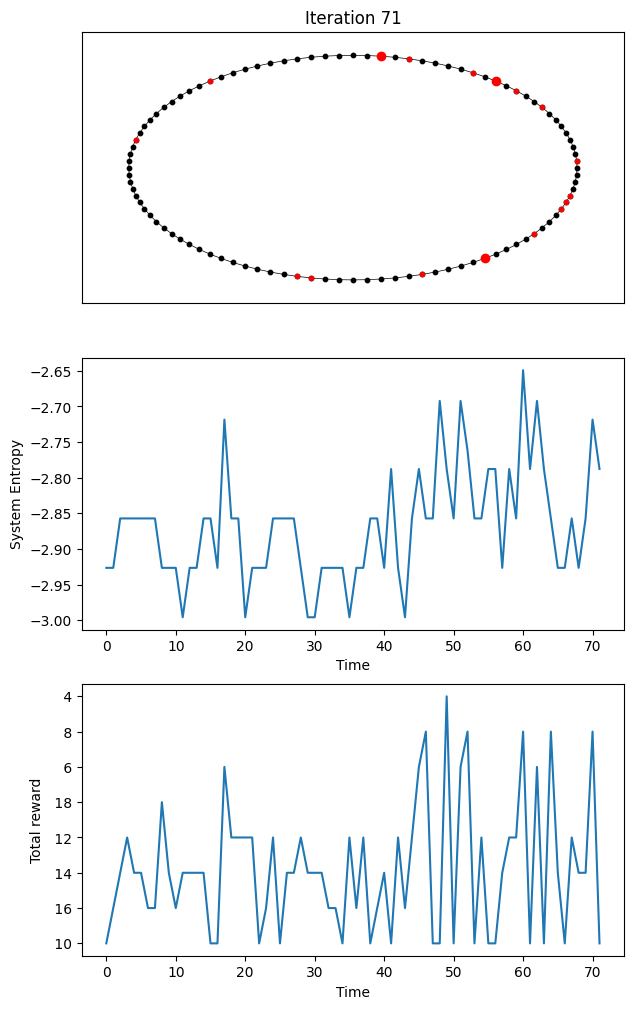

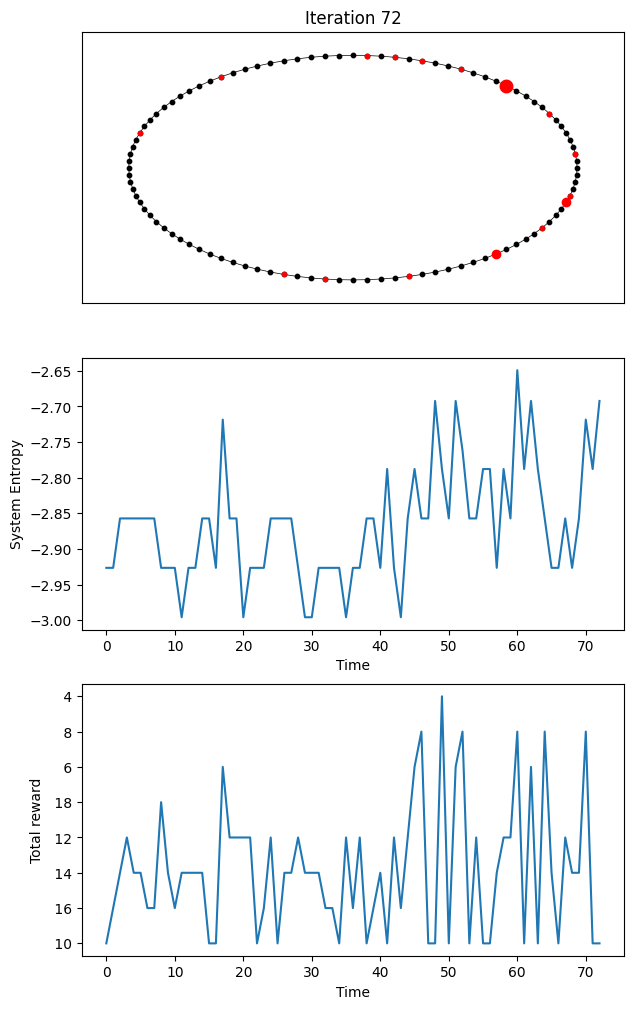

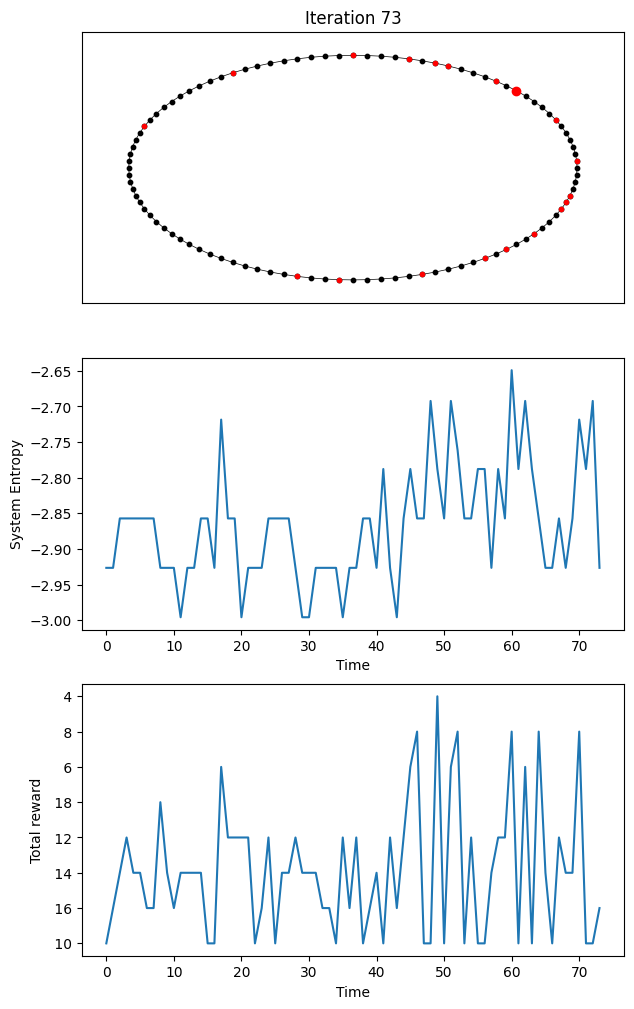

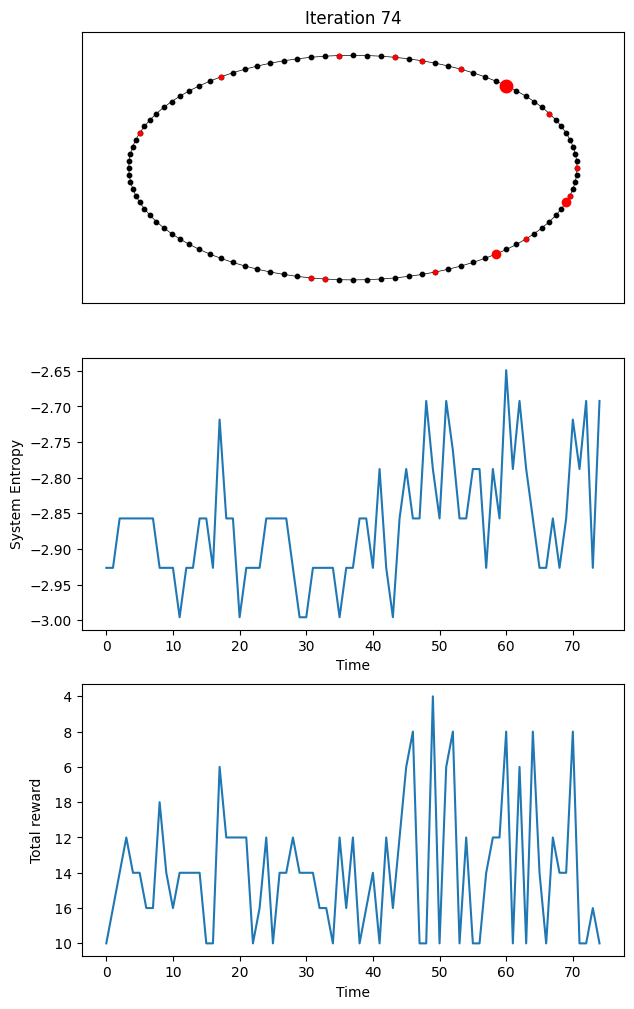

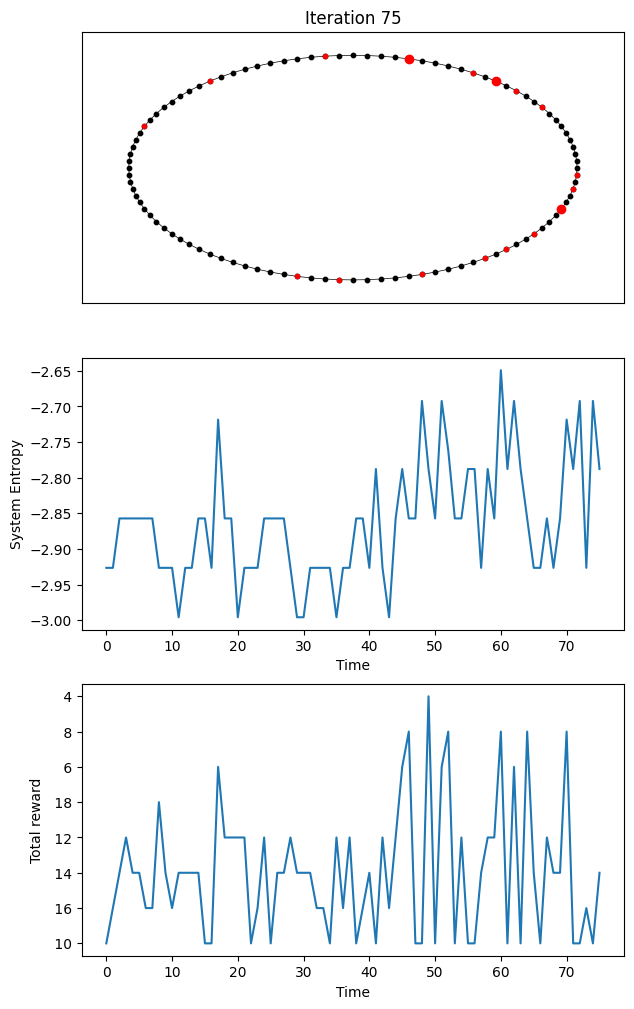

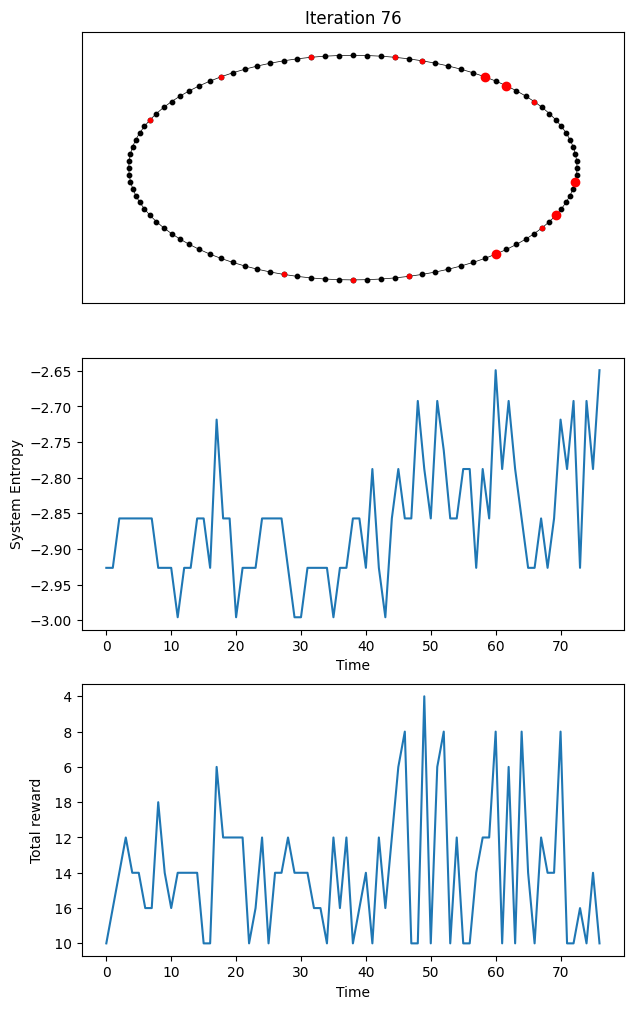

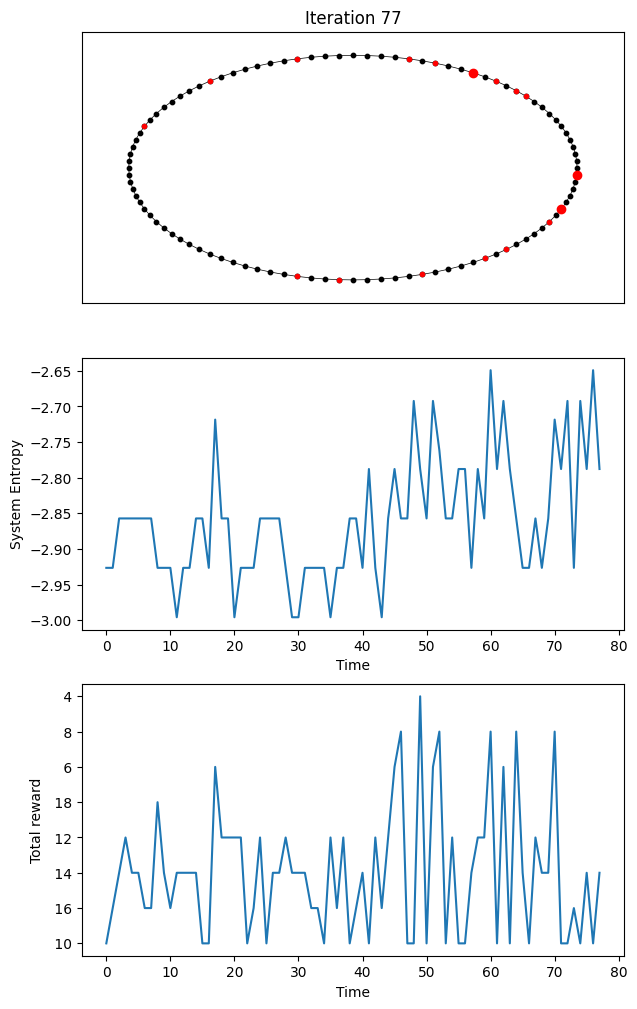

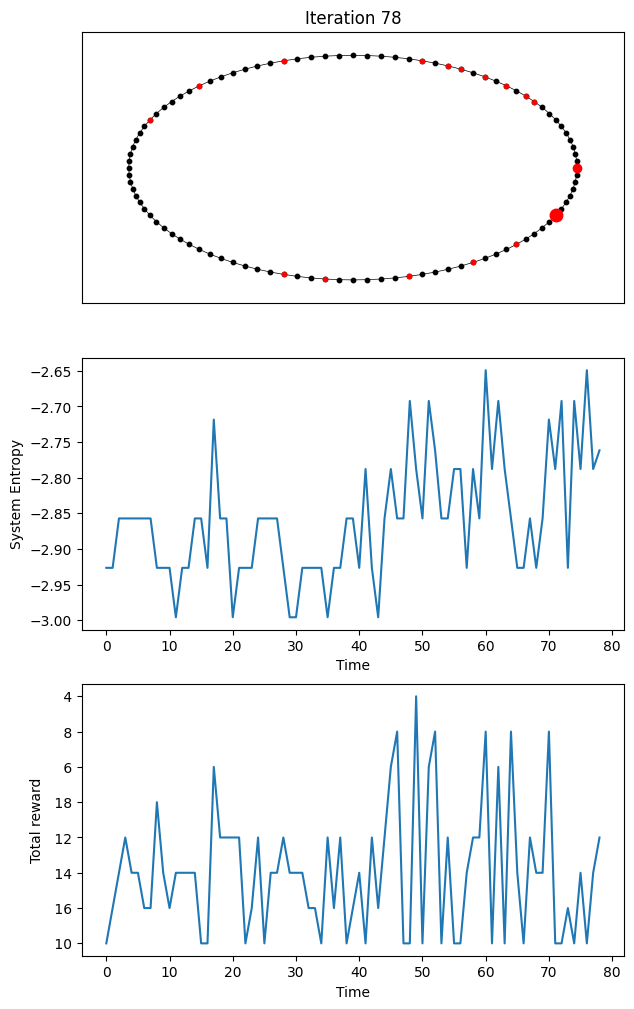

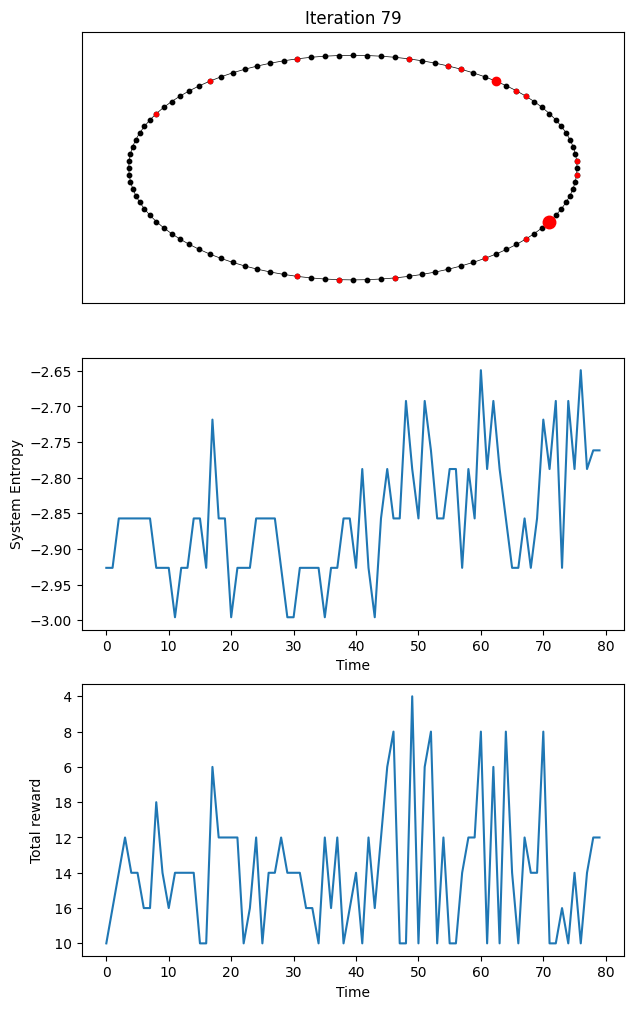

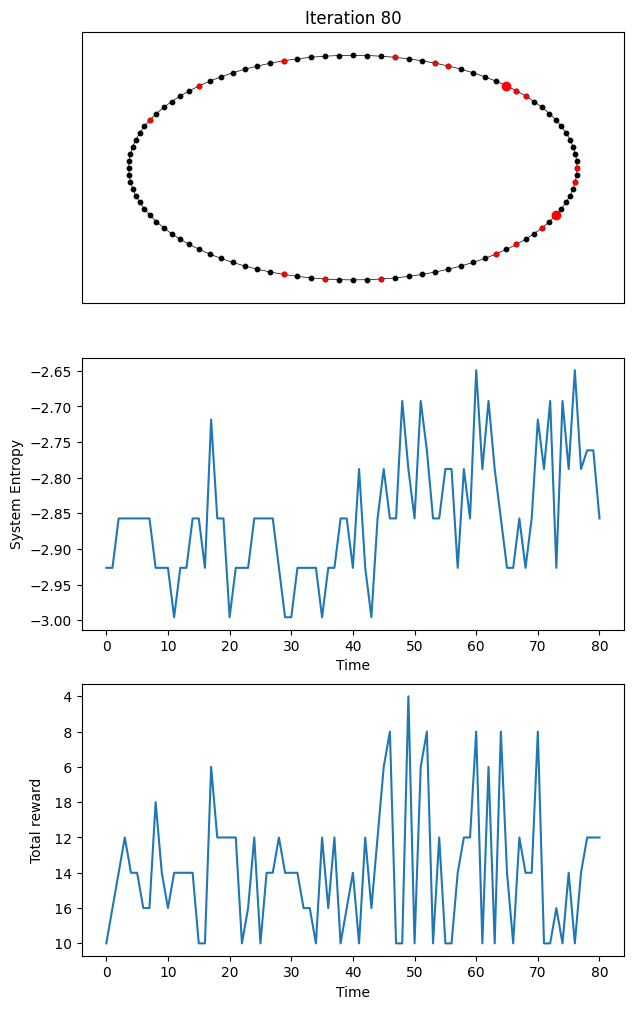

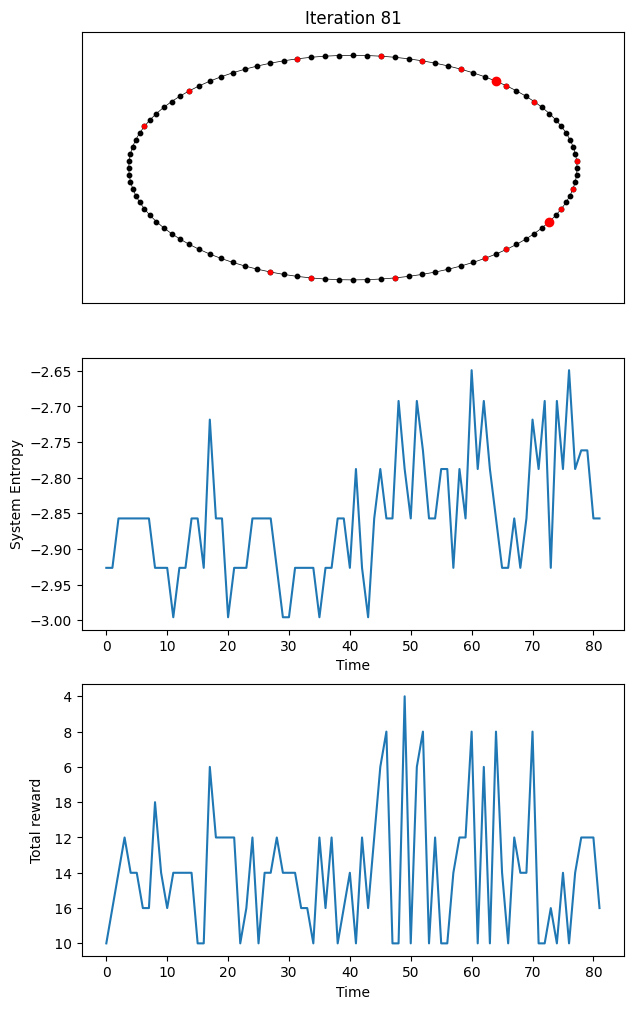

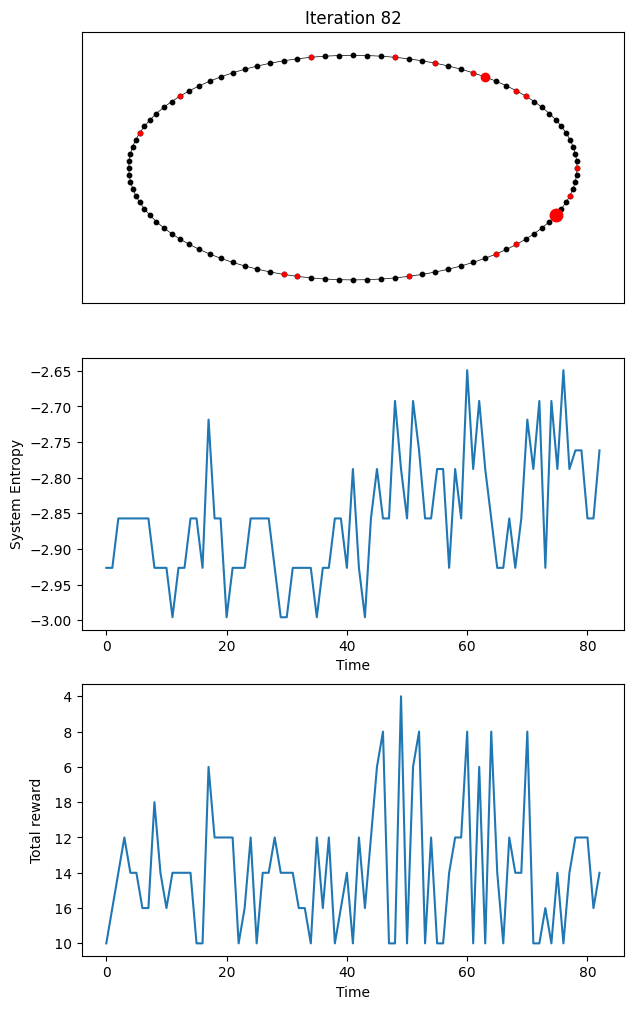

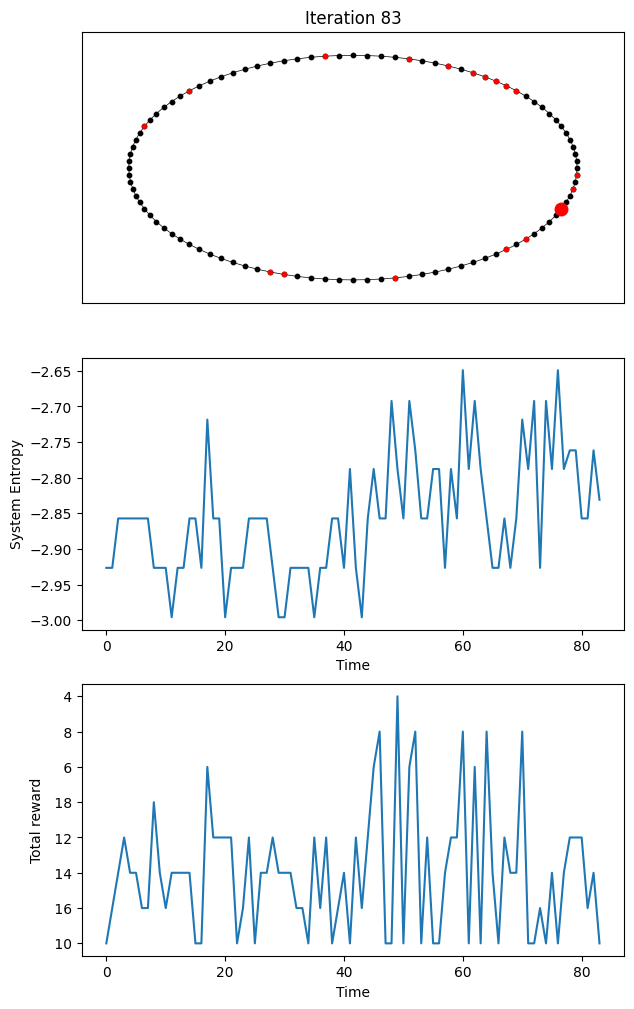

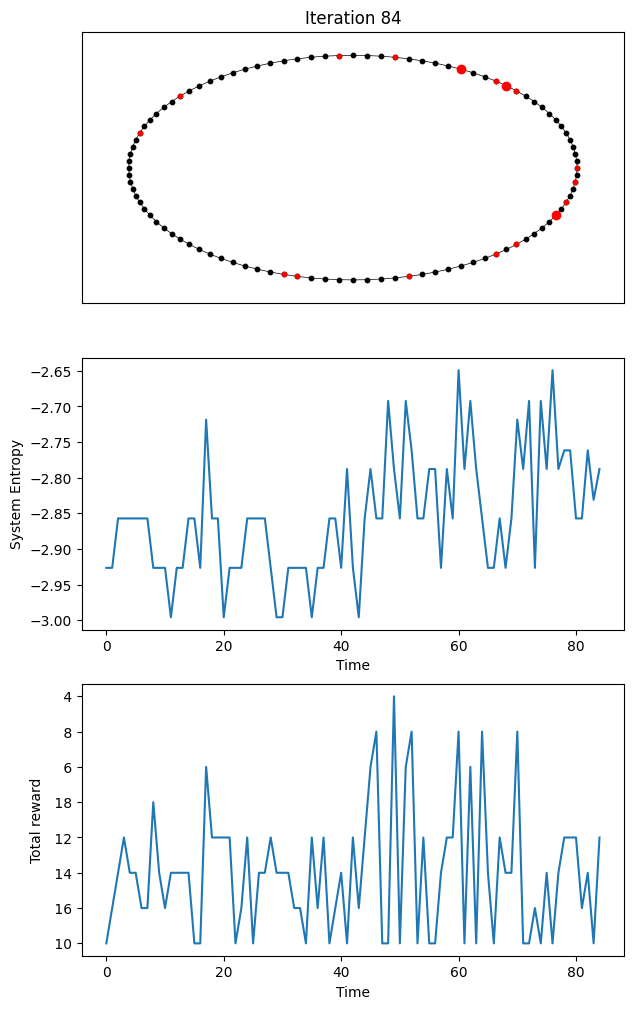

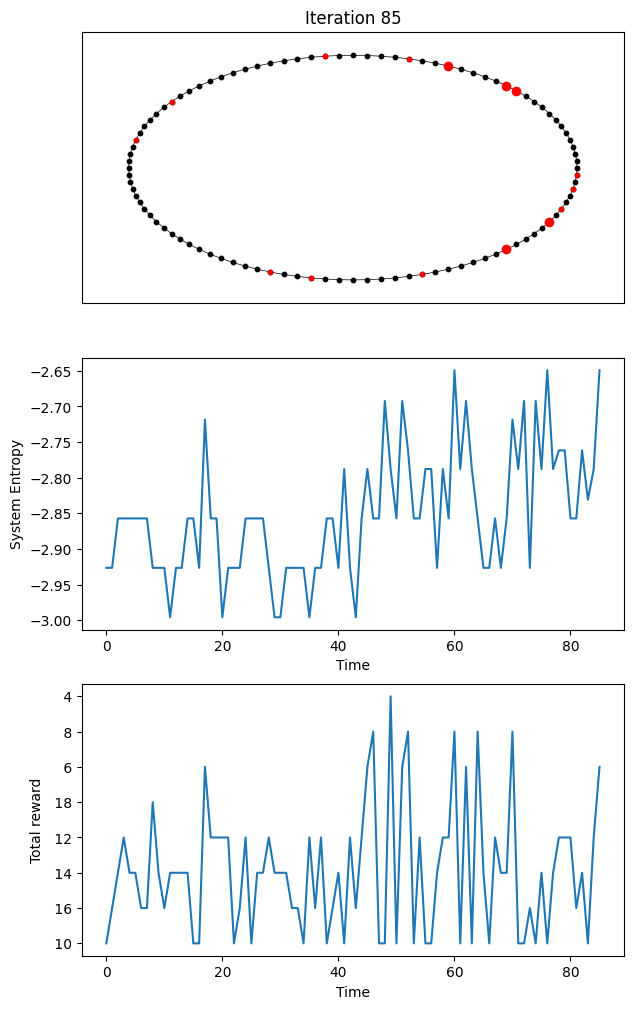

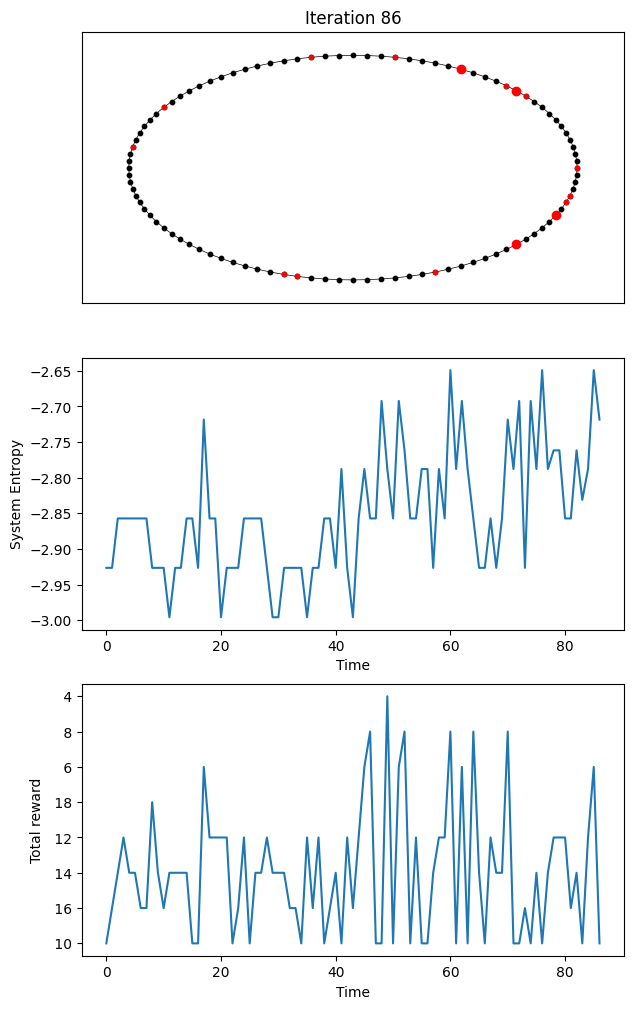

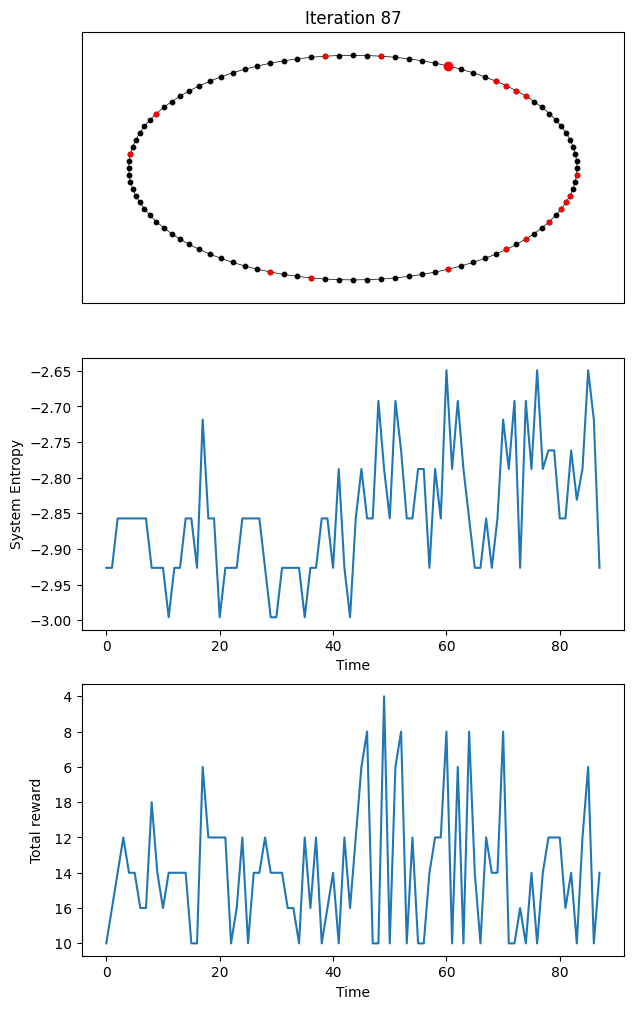

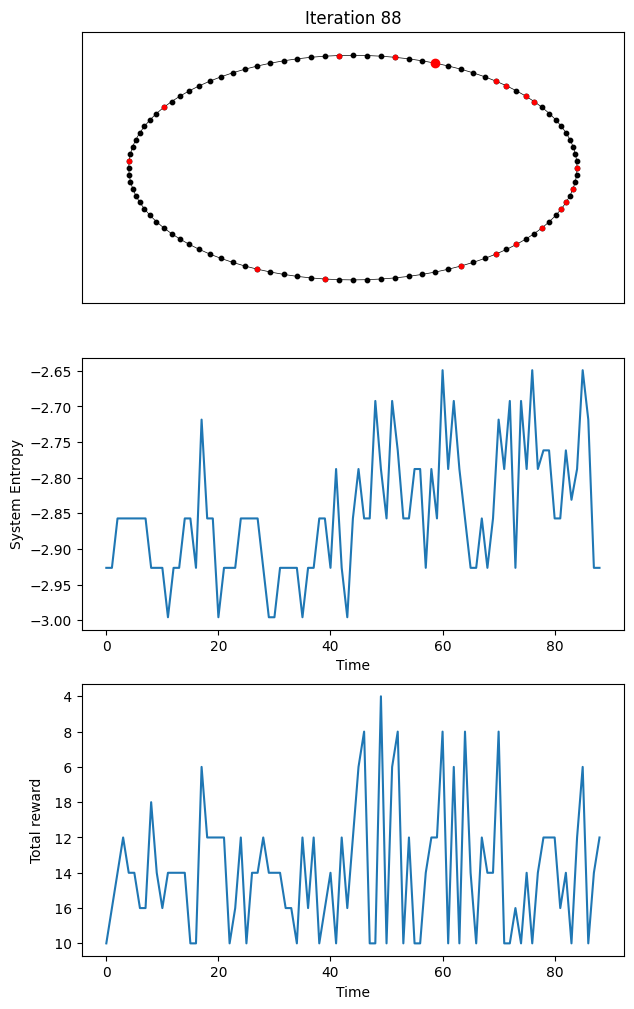

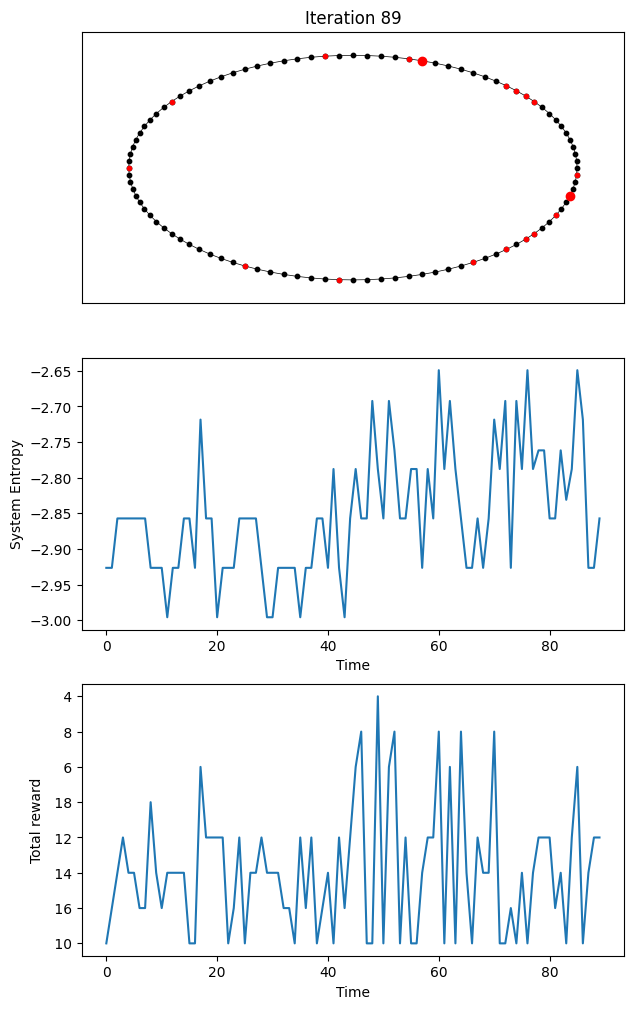

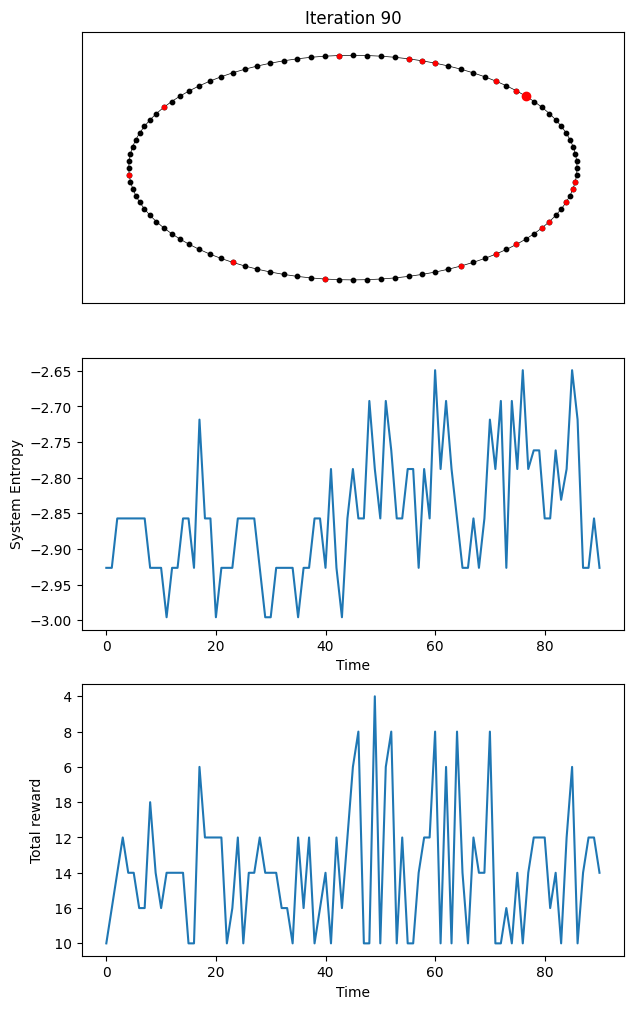

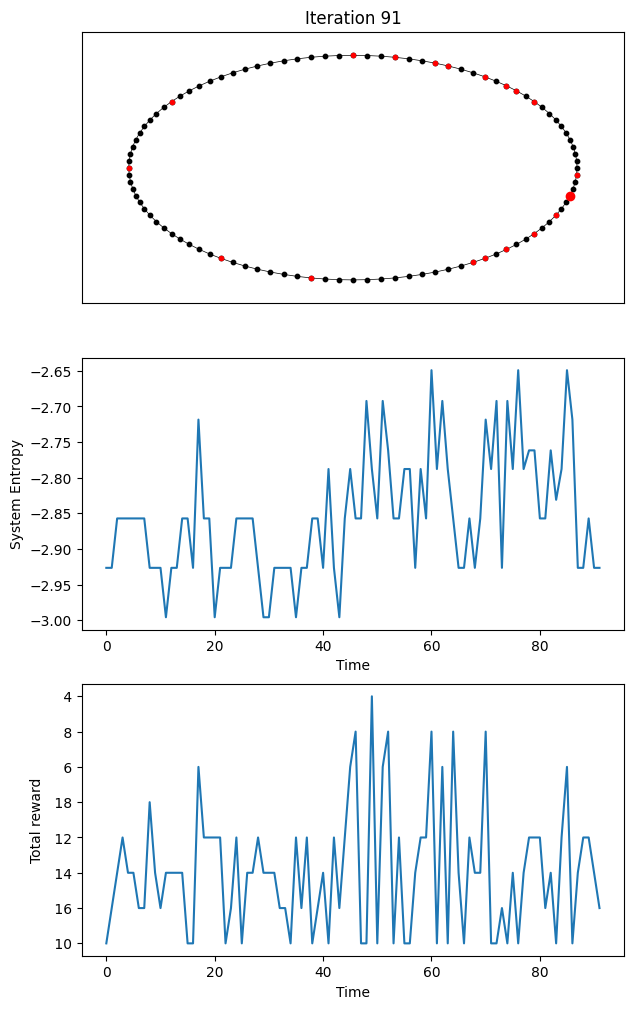

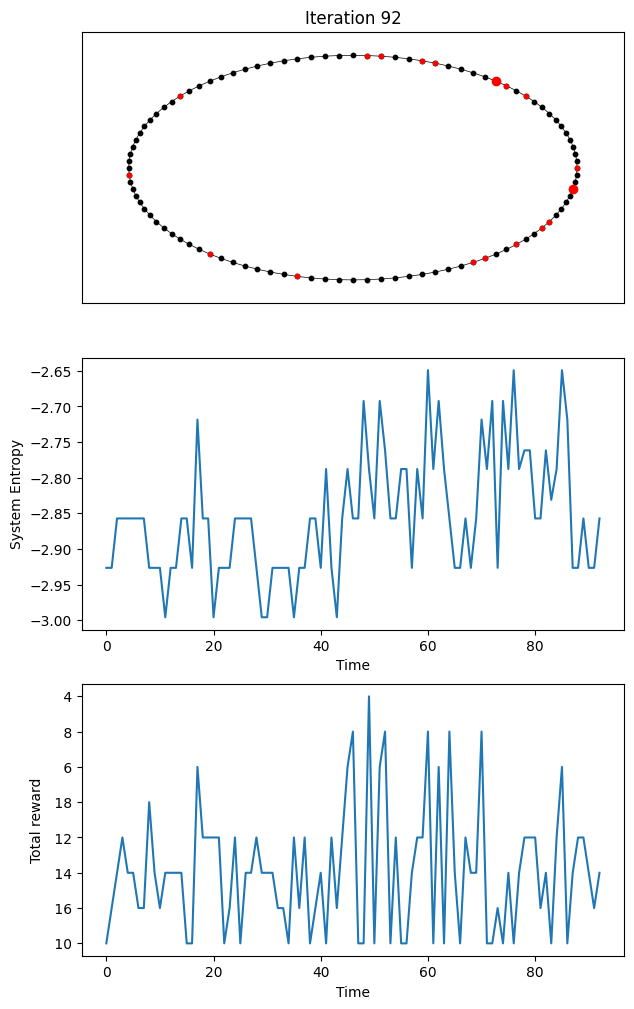

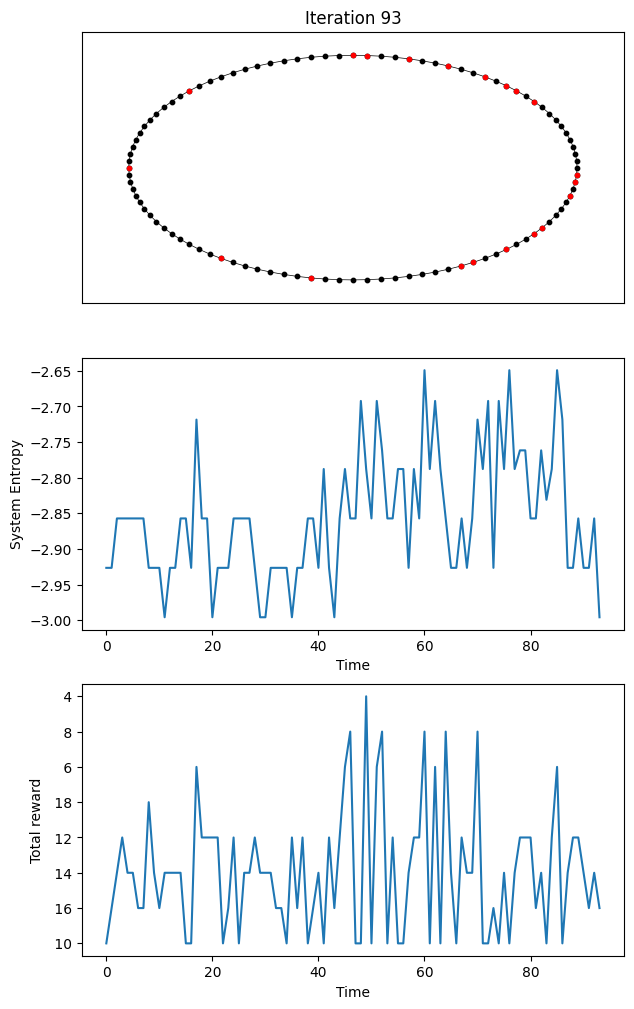

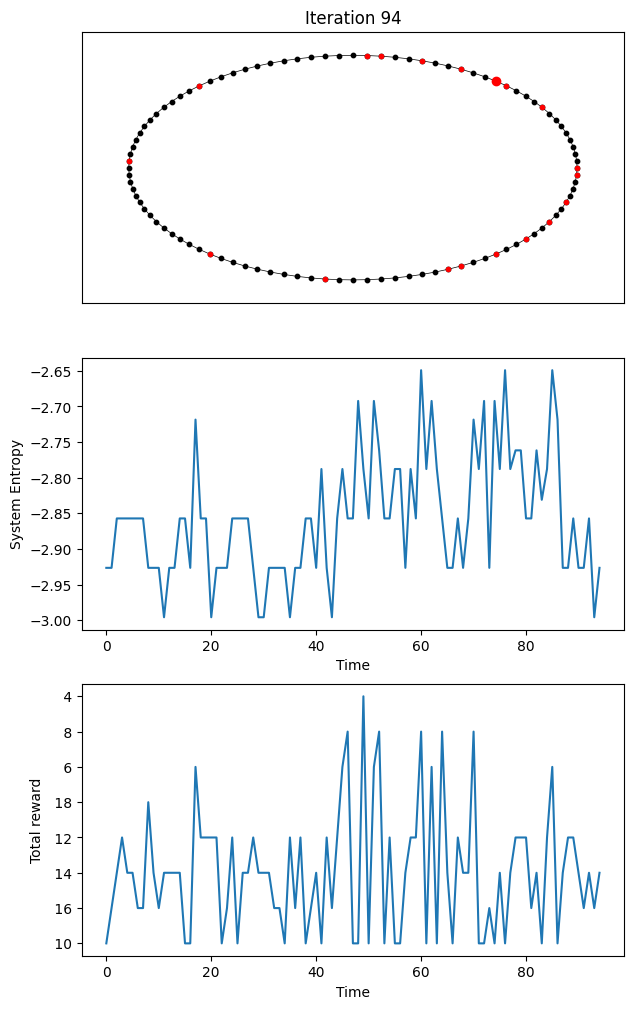

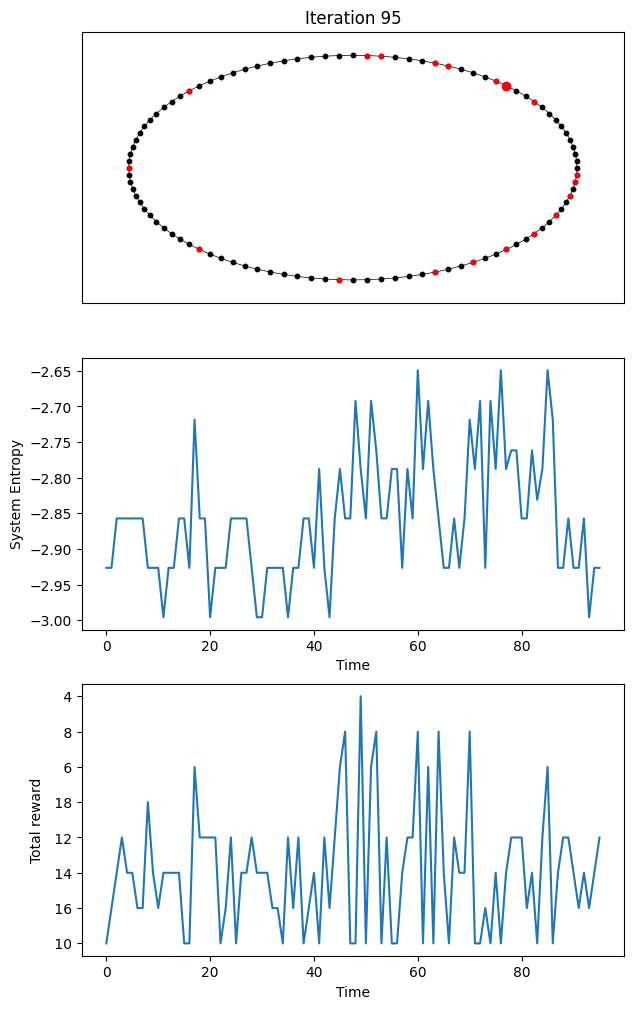

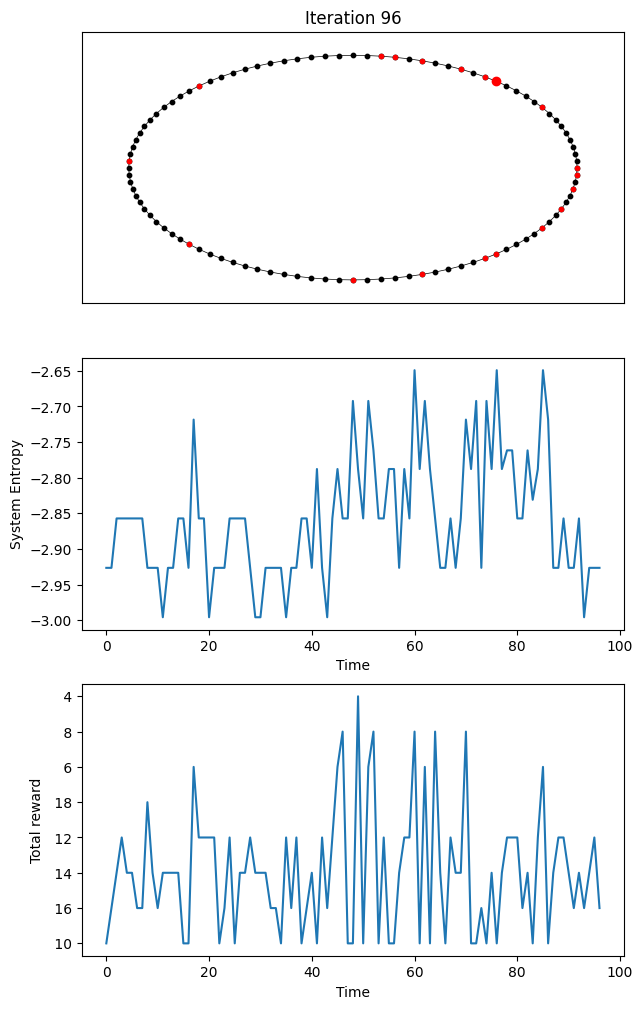

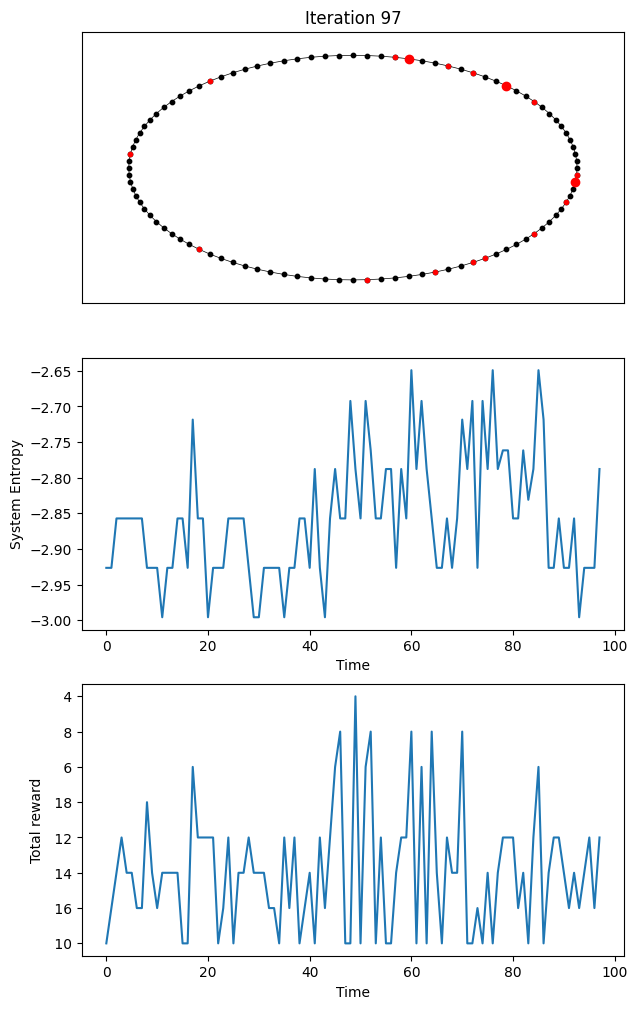

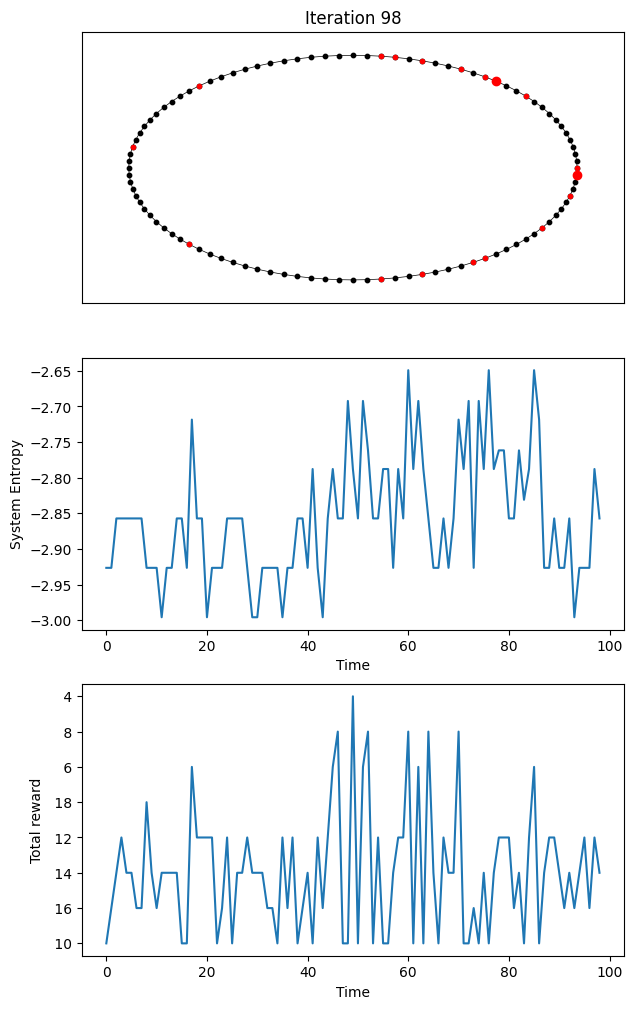

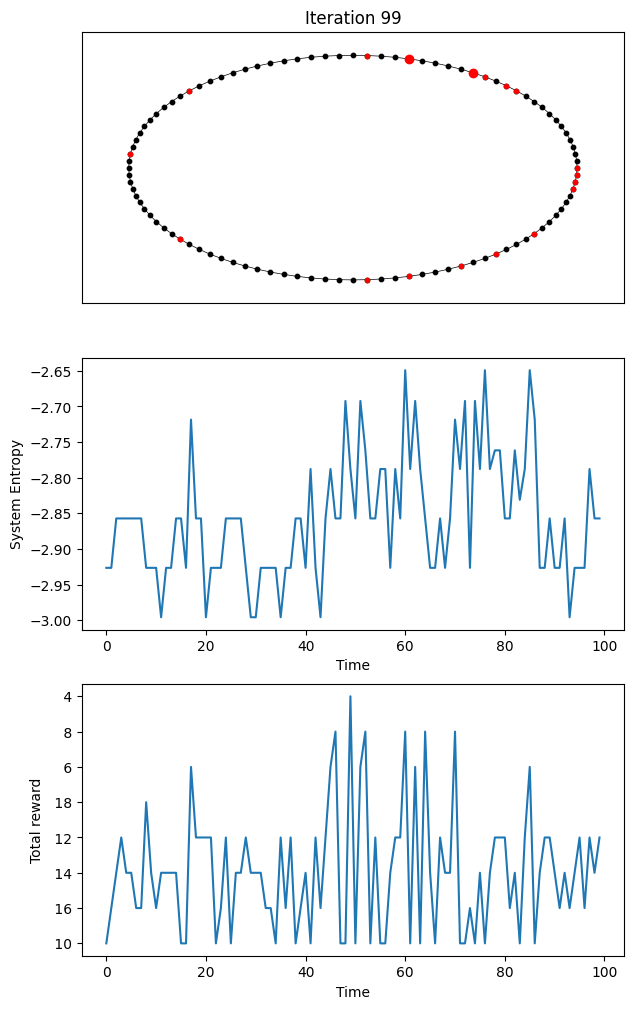

In [12]:
#plotting particle locations

filenames = []

for i in range(0,100):
    fig, (ax1,ax2,ax3) = plt.subplots(3,figsize =(7,12))
    nx.draw_networkx(G, with_labels = False, pos=node_pos, ax = ax1, node_size = 10, node_color = 'black', width =0.5)
    for n in range(0,len(nodes)):
        #node_loc = trajectories[n][i]
        ax1.plot(node_pos[n][0],node_pos[n][1], color = 'red', marker = 'o', markersize = 3*a[i][n])
    
    t = np.linspace(0,i,i+1)
    ax2.plot(t, system_entropy[0:i+1])    
    ax2.set_xlabel('Time')
    ax2.set_ylabel('System Entropy')
    ax3.plot(t,rewards[0:i+1])
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Total reward')
    ax1.set_title(f'Iteration {i}')
    ax1.set_xticks([])
    ax1.set_yticks([])
    plt.show()
    
    filename = f'{i}.png'
    filenames.append(filename)
    
    # save frame
    fig.savefig(filename)

In [13]:
# build gif
with imageio.get_writer('test_exp_100_iterations.gif', mode='I', duration = 0.5) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

/tmp/ipykernel_48507/3806150310.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
